In [ ]:
#import statements
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from scipy.stats import mode
#import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Cleaning**

**Data Cleaning Process**:
(1) Create dataframes corresponding to the happiness data and the World Bank dataset;
(2) Clean both datasets (make sure the country names correspond to each other, a lot of the country names have unnecessary punctuation or are spelled slightly differently, like "Viet Nam" and "Vietnam");
(3) Drop columns (features) that have too many "NA" values;
(4) Merge datasets by country name

In [ ]:
# Get the world happiness data for 2022
happiness_df = pd.read_excel('/content/drive/MyDrive/DATA119Midterm/DATA/World-Happiness-Report/2022-Happiness-Data.xlsx')

In [ ]:
happiness_df

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.8210,7.886425,7.755575,2.518052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658
1,2,Denmark,7.6362,7.709897,7.562503,2.225632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079
2,3,Iceland,7.5575,7.651076,7.463924,2.320185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204
3,4,Switzerland,7.5116,7.586394,7.436806,2.152746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004
4,5,Netherlands,7.4149,7.471265,7.358534,2.136937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,3.2682,3.462218,3.074182,0.536299,0.785252,0.132698,0.461527,0.621479,0.186662,0.544236
143,144,Zimbabwe,2.9951,3.109822,2.880378,0.547529,0.946604,0.690460,0.270086,0.329203,0.106265,0.104943
144,145,Lebanon,2.9553,3.048951,2.861649,0.215537,1.392068,0.497999,0.630964,0.102799,0.082191,0.033761
145,146,Afghanistan,2.4038,2.468731,2.338869,1.263403,0.757994,0.000000,0.288626,0.000000,0.088873,0.004882


In [ ]:
# Make the happiness_data dataframe have 2 columns, one for country and one for happiness score
happiness_df = happiness_df[["Country", "Happiness score"]]
happiness_df

,Country,Happiness score
0,Finland,7.8210
1,Denmark,7.6362
2,Iceland,7.5575
3,Switzerland,7.5116
4,Netherlands,7.4149
...,...,...
142,Rwanda*,3.2682
143,Zimbabwe,2.9951
144,Lebanon,2.9553
145,Afghanistan,2.4038


In [ ]:
#adding more WHR variables from a different sheet, but same report (Generosity, etc.)
# 2022 is in the 2023 report
WHR_vars = pd.read_excel('/content/drive/MyDrive/DATA119Midterm/DATA/World-Happiness-Report/DataForTable2.1WHR2023.xlsx')
WHR22 = WHR_vars[(WHR_vars.year == 2022)]

WHR22_drop = ['Perceptions of corruption', 'Positive affect', 'Negative affect', 'Log GDP per capita', 'year', 'Healthy life expectancy at birth']
WHR22 = WHR22.drop(columns=WHR22_drop)
WHR22

,Country,Life Ladder,Social support,Freedom to make life choices,Generosity
13,Afghanistan,1.281271,0.228217,0.368377,NaN
28,Albania,5.212213,0.724090,0.802250,-0.065987
59,Argentina,6.260993,0.893330,0.825189,-0.127506
75,Armenia,5.381943,0.811169,0.789599,-0.154325
91,Australia,7.034696,0.941673,0.853777,0.153465
...,...,...,...,...,...
2104,Uruguay,6.670853,0.904825,0.877969,-0.051668
2120,Uzbekistan,6.016239,0.878923,0.959019,0.308951
2137,Venezuela,5.948992,0.899366,0.770417,NaN
2154,Vietnam,6.266509,0.878744,0.975405,-0.178987


In [ ]:
# Merge the two WHR sheets into one happiness_df
happiness_df = pd.merge(happiness_df, WHR22, on='Country', how='left')
happiness_df

,Country,Happiness score,Life Ladder,Social support,Freedom to make life choices,Generosity
0,Finland,7.8210,7.728998,0.974395,0.958609,0.102147
1,Denmark,7.6362,7.544965,0.970306,0.929547,0.224115
2,Iceland,7.5575,7.448794,0.984801,0.935669,0.221911
3,Switzerland,7.5116,6.883844,0.880787,0.848361,0.128131
4,Netherlands,7.4149,7.389636,0.928908,0.868093,0.224344
...,...,...,...,...,...,...
142,Rwanda*,3.2682,NaN,NaN,NaN,NaN
143,Zimbabwe,2.9951,3.296220,0.666172,0.651987,-0.069513
144,Lebanon,2.9553,2.352428,0.534528,0.449575,-0.125514
145,Afghanistan,2.4038,1.281271,0.228217,0.368377,NaN


In [ ]:
#rename "Happiness Score" to just "Happiness" for ease-of-use in the future; do this for multiple features

mapping = {
    "Happiness score": "Happiness",
    "Social support": "SocSupport",
    "Freedom to make life choices": "Freedom",
    "Life Ladder": "Ladder"
    }

happiness_df = happiness_df.rename(columns=mapping)

#number of country names
#happiness_df["Country"].to_list()
happiness_df

,Country,Happiness,Ladder,SocSupport,Freedom,Generosity
0,Finland,7.8210,7.728998,0.974395,0.958609,0.102147
1,Denmark,7.6362,7.544965,0.970306,0.929547,0.224115
2,Iceland,7.5575,7.448794,0.984801,0.935669,0.221911
3,Switzerland,7.5116,6.883844,0.880787,0.848361,0.128131
4,Netherlands,7.4149,7.389636,0.928908,0.868093,0.224344
...,...,...,...,...,...,...
142,Rwanda*,3.2682,NaN,NaN,NaN,NaN
143,Zimbabwe,2.9951,3.296220,0.666172,0.651987,-0.069513
144,Lebanon,2.9553,2.352428,0.534528,0.449575,-0.125514
145,Afghanistan,2.4038,1.281271,0.228217,0.368377,NaN


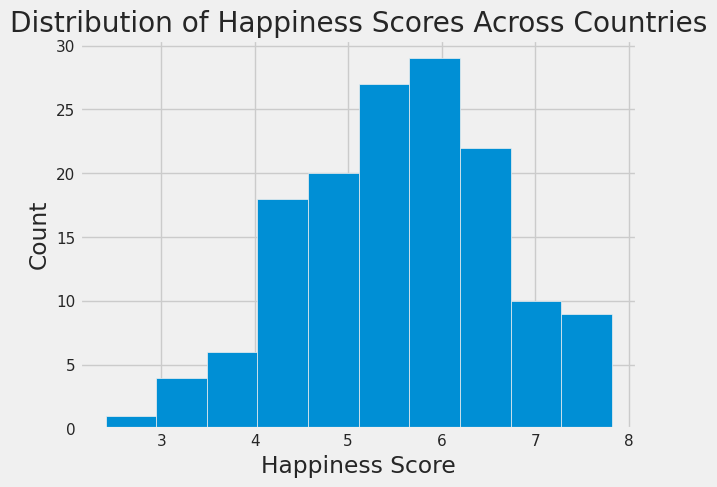

In [ ]:
# Distribution of Happiness Scores Across Countries

plt.hist(happiness_df["Happiness"])
plt.title("Distribution of Happiness Scores Across Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Count")
plt.show()

In [ ]:
# Remove the asterisks from country names
for i in np.arange(len(happiness_df)):
  if ("*" in happiness_df.loc[i, "Country"]):
    happiness_df.loc[i, "Country"] = happiness_df.loc[i, "Country"].replace("*", "")

In [ ]:
!pip install geodatasets

In [ ]:
import geopandas

In [ ]:
# Read world file with geometry/coordinates for countries
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')) #download world data

In [ ]:
world = world[['name', 'geometry']]
world = world.rename(columns={"name": "Country"})

In [ ]:
# Check overlap between two Country columns to check whether there are names that don't overlap but should be (like United States vs. United States of America)
def check_overlap(df_1, df_2):
  overlap = np.array([])
  no_overlap = np.array([])
  for each in df_1.Country.to_list():
    if each in df_2.Country.to_list():
      overlap = np.append(overlap, each)
    else:
      no_overlap = np.append(no_overlap, each) #in df1 but not in df2
  print("Overlap: ", overlap)
  print("No overlap (in df1): ", no_overlap)

In [ ]:
check_overlap(world, happiness_df)
# Need to fix United States, Dominican Republic, Ivory Coast, Eswatini, Palestine, Taiwan Province of China, Bosnia and Herzegovina
# What about Guinea? Don't know what Guinea refers to in the Happiness dataset -- same with Congo

Overlap:  ['Tanzania' 'Canada' 'Kazakhstan' 'Uzbekistan' 'Indonesia' 'Argentina'
 'Chile' 'Kenya' 'Chad' 'Russia' 'Norway' 'South Africa' 'Lesotho'
 'Mexico' 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama'
 'Costa Rica' 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Venezuela'
 'France' 'Ecuador' 'Jamaica' 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal'
 'Mali' 'Mauritania' 'Benin' 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana'
 'Guinea' 'Liberia' 'Sierra Leone' 'Burkina Faso' 'Congo' 'Gabon' 'Zambia'
 'Malawi' 'Mozambique' 'Israel' 'Lebanon' 'Madagascar' 'Gambia' 'Tunisia'
 'Algeria' 'Jordan' 'United Arab Emirates' 'Kuwait' 'Iraq' 'Cambodia'
 'Thailand' 'Laos' 'Myanmar' 'Vietnam' 'South Korea' 'Mongolia' 'India'
 'Bangladesh' 'Nepal' 'Pakistan' 'Afghanistan' 'Tajikistan' 'Kyrgyzstan'
 'Turkmenistan' 'Iran' 'Armenia' 'Sweden' 'Belarus' 'Ukraine' 'Poland'
 'Austria' 'Hungary' 'Moldova' 'Romania' 'Lithuania' 'Latvia' 'Estonia'
 'Germany' 'Bulgaria' 'Greece' 'Turkey' 'Albania' 'Croatia'

In [ ]:
# Change variables in 'happiness_df' to correspond names in 'world_df' dataset

happiness_df_vis = happiness_df.replace({
                  "United States": "United States of America",
                  "Dominican Republic": "Dominican Rep.",
                  "Ivory Coast": "Côte d'Ivoire",
                  "Eswatini, Kingdom of": "eSwatini",
                  "Palestinian Territories": "Palestine",
                  "Taiwan Province of China": "Taiwan",
                  "Bosnia and Herzegovina": "Bosnia and Herz.",
                  })

In [ ]:
# Merge two dataframes based on 'Country'
merge=pd.merge(world,happiness_df_vis,on='Country')
merge.head(5)

,Country,geometry,Happiness,Ladder,SocSupport,Freedom,Generosity
0,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",3.7024,3.615845,0.600181,0.856140,0.136042
1,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.0251,6.917935,0.929102,0.838264,0.221542
2,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",6.9768,6.692790,0.900262,0.735640,0.190581
3,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",6.2341,6.006279,0.923373,0.882938,0.022408
4,Uzbekistan,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",6.0627,6.016239,0.878923,0.959019,0.308951


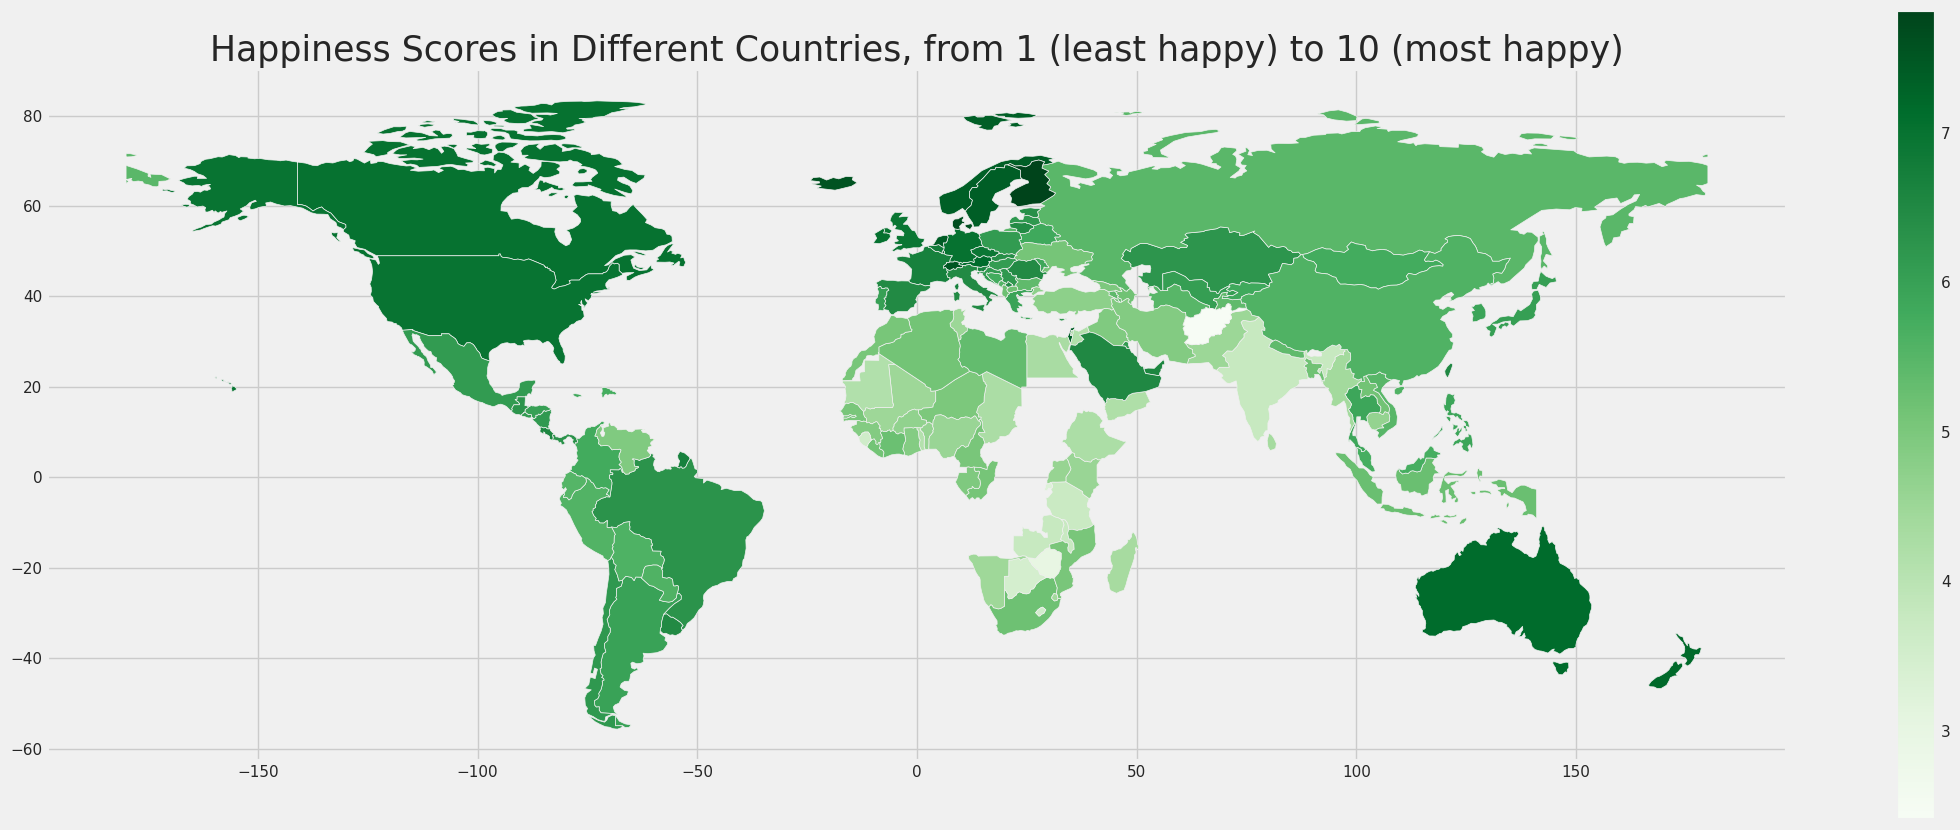

In [ ]:
# Not all countries have data, but display data
merge.plot(column='Happiness',
           figsize=(25, 10),
           legend=True, cmap='Greens')

plt.title('Happiness Scores in Different Countries, from 1 (least happy) to 10 (most happy)',fontsize=25)

plt.show()

In [ ]:
# Get World Bank data with features from 2022
features_wb = pd.read_csv('/content/drive/MyDrive/DATA119Midterm/DATA/Country_Data.csv')

In [ ]:
features_wb.head(5)

,Time,Time Code,Country Name,Country Code,Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+) [FX.OWN.TOTL.ZS],"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+) [FX.OWN.TOTL.FE.ZS]",Adequacy of social insurance programs (% of total welfare of beneficiary households) [per_si_allsi.adq_pop_tot],...,Urban population growth (annual %) [SP.URB.GROW],Voice and Accountability: Estimate [VA.EST],Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Women who were first married by age 18 (% of women ages 20-24) [SP.M18.2024.FE.ZS],"Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age) [SH.ALC.PCAP.MA.LI]","School enrollment, primary (% net) [SE.PRM.NENR]","School enrollment, primary, female (% net) [SE.PRM.NENR.FE]","School enrollment, secondary, female (% net) [SE.SEC.NENR.FE]","School enrollment, secondary, male (% net) [SE.SEC.NENR.MA]","School enrollment, primary, male (% net) [SE.PRM.NENR.MA]"
0,2022,YR2022,Afghanistan,AFG,..,..,..,..,..,..,...,3.67564741322498,-1.75158727169037,..,..,..,..,..,..,..,..
1,2022,YR2022,Albania,ALB,..,..,..,..,..,..,...,0.0937160630163749,0.13946570456028,..,..,..,..,..,..,..,..
2,2022,YR2022,Algeria,DZA,..,..,..,..,..,..,...,2.31409357700036,-1.00387418270111,..,..,..,..,..,..,..,..
3,2022,YR2022,American Samoa,ASM,..,..,..,..,..,..,...,-1.67738742311809,0.957647860050201,..,..,..,..,..,..,..,..
4,2022,YR2022,Andorra,AND,..,..,..,..,..,..,...,0.940293027193117,1.10283291339874,..,..,..,..,..,..,..,..


In [ ]:
# Extract data from world dev data for just 2022
features_wb.shape
features_wb = features_wb.drop(['Time', 'Time Code', 'Country Code'], axis=1) #drop Year, Time, and Country Code because these features are unnecessary

In [ ]:
# Rename Country column
features_wb = features_wb.rename(columns={
                     "Country Name": "Country"})

In [ ]:
check_overlap(features_wb, happiness_df)
# The misaligned countries that should be overlaps are Hong Kong SAR, China, Korea, Yemen, Ivory Coast, Dominican Republic, Egypt, Guinea, Eswatini, Kingdom of, Gambia, Iran, Kyrgyzstan, Laos, Russia, Slovakia, Turkey, Venezuela, Vietnam
#removed Guinea because not sure if it's Guinea-Bissau or Equatorial Guinea; same with Congo (Dem. Repub of Congo vs Congo)

Overlap:  ['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Benin'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria'
 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Estonia' 'Ethiopia'
 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Mali' 'Malta'
 'Mauritania' 'Mauritius' 'Mexico' 'Moldova' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Netherlands'
 'New Zealand' 'Nicaragua' 'Niger' 'Nigeria' 'North Macedonia' 'Norway'


In [ ]:
#the misaligned ones that should be overlaps are Hong Kong SAR, China, Korea, Yemen
#Congo, Ivory Coast, Egypt, Eswatini, Gambia,
#Iran, Kyrgyzstan, Laos, Russia, Slovakia, Turkey, Venezuela, Vietnam

features_wb = features_wb.replace({
                  "Hong Kong SAR, China": "Hong Kong",
                  "Korea, Rep.": "South Korea",
                  "Yemen, Rep.": "Yemen",
                  "Cote d'Ivoire": "Ivory Coast",
                  "Egypt, Arab Rep.": "Egypt",
                  "Eswatini": "Eswatini, Kingdom of",
                  "Gambia, The": "Gambia",
                  "Iran, Islamic Rep.": "Iran",
                  "Kyrgyz Republic": "Kyrgyzstan",
                  "Lao PDR": "Laos",
                  "Russian Federation": "Russia",
                  "Slovak Republic": "Slovakia",
                  "Turkiye": "Turkey",
                  "Venezuela, RB": "Venezuela",
                  "Viet Nam": "Vietnam"
                  })

In [ ]:
# Combine WHR and WDI into one
final_df = features_wb.merge(happiness_df, how='inner', on='Country')

In [ ]:
# Only keep columns without null values, but we don't want to get rid of too many variables, so we set the threshold to 100 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
# Can't just enter / fill in null values because null values are arbitrary
final_df = final_df.replace('..', np.nan) #'..' means NaN in Python
final_df = final_df.dropna(axis=1, thresh = 100) #could also use how = all or any

In [ ]:
final_df.shape #drop

(141, 32)

In [ ]:
final_df.head(10)

,Country,Age dependency ratio (% of working-age population) [SP.POP.DPND],Consumer price index (2010 = 100) [FP.CPI.TOTL],Control of Corruption: Estimate [CC.EST],"Foreign direct investment, net outflows (BoP, current US$) [BM.KLT.DINV.CD.WD]",GDP (constant 2015 US$) [NY.GDP.MKTP.KD],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS],Government Effectiveness: Estimate [GE.EST],...,Population growth (annual %) [SP.POP.GROW],Rule of Law: Estimate [RL.EST],Rural population (% of total population) [SP.RUR.TOTL.ZS],Trade (% of GDP) [NE.TRD.GNFS.ZS],Urban population (% of total population) [SP.URB.TOTL.IN.ZS],Urban population growth (annual %) [SP.URB.GROW],Voice and Accountability: Estimate [VA.EST],Happiness,Ladder,SocSupport
0,Afghanistan,83.570360,NaN,-1.18377649784088,NaN,NaN,NaN,NaN,NaN,-1.87955236434937,...,2.53449831666733,-1.65844225883484,73.384,NaN,26.616,3.67564741322498,-1.75158727169037,2.4038,1.281271,0.228217
1,Albania,48.813511,131.750834819418,-0.407875537872314,173753265.706846,14319794712.6268,18916378860.5488,4.85640165227306,10.1787589198906,0.0650628432631493,...,-1.21579032012532,-0.16577909886837,36.201,85.1496805230602,63.799,0.0937160630163749,0.13946570456028,5.1988,5.212213,0.724090
2,Algeria,58.808385,181.619931977783,-0.637929856777191,70566793.105313,179602019799.393,194998449769.085,3.20000164670707,15.483516801017,-0.513090252876282,...,1.62833925417918,-0.832472681999207,25.228,59.0422842448932,74.772,2.31409357700036,-1.00387418270111,5.1223,NaN,NaN
3,Argentina,53.779107,NaN,-0.447030484676361,2076450897.97089,598312841626.662,631133384439.944,4.95636996008236,15.3969250454856,-0.282877296209335,...,0.925835473662058,-0.48068231344223,7.65300000000001,31.6505139756506,92.347,1.0536956642987,0.543526768684387,5.9670,6.260993,0.893330
4,Armenia,50.661526,152.243300572606,0.0280352365225554,49744937.6177013,14225451502.9381,19513474648.2429,12.6,12.699143574047,-0.314229518175125,...,-0.377102034390101,-0.168567225337029,36.427,101.006492374141,63.573,-0.153477828560035,0.0882339403033257,5.3986,5.381943,0.811169
5,Australia,54.040790,132.466181061394,1.76448953151703,123356162594.649,1586172577281.96,1692956646855.7,4.26894639349867,22.0192172108857,1.52887463569641,...,1.23863879657531,1.51008522510529,13.512,45.1367444404109,86.488,1.38442583339144,1.31948041915894,7.1621,7.034696,0.941673
6,Austria,51.941334,133.513565675464,1.25861942768097,-2392507341.55859,422235060667.714,470941926750.741,4.80643020178459,20.5887853618654,1.46545016765594,...,0.956287797076634,1.70585024356842,40.744,123.685438704967,59.256,1.39772647778413,1.40876078605652,7.1630,6.998997,0.876287
7,Azerbaijan,44.067117,195.761197791667,-1.04057228565216,172210000,56692460618.264,78721058823.5294,4.61652296344128,10.9271156981688,-0.0406579151749611,...,0.039507866238038,-0.624645590782166,42.83,87.0777533181195,57.17,0.731066864167429,-1.4408358335495,5.1734,NaN,NaN
8,Bahrain,31.479103,119.496930529675,0.139385640621185,1947872340.4255,35915819622.2345,44383297872.3404,4.86085827172992,NaN,0.640424907207489,...,0.611005553402689,0.438828617334366,10.257,NaN,89.743,0.74594867804318,-1.41756176948547,6.6469,NaN,NaN
9,Bangladesh,47.088191,215.864586624406,-1.0755273103714,15585449.7315411,305522973769.778,460201265527.977,7.09982877575158,5.69899955596024,-0.76255190372467,...,1.0748367431585,-0.601339340209961,60.289,33.7799672705735,39.711,3.02005134703142,-0.752661883831024,5.1555,3.407532,0.403708


In [ ]:
final_df.columns

Index(['Country',
       'Age dependency ratio (% of working-age population) [SP.POP.DPND]',
       'Consumer price index (2010 = 100) [FP.CPI.TOTL]',
       'Control of Corruption: Estimate [CC.EST]',
       'Foreign direct investment, net outflows (BoP, current US$) [BM.KLT.DINV.CD.WD]',
       'GDP (constant 2015 US$) [NY.GDP.MKTP.KD]',
       'GDP (current US$) [NY.GDP.MKTP.CD]',
       'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
       'General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]',
       'Government Effectiveness: Estimate [GE.EST]',
       'Gross domestic savings (current US$) [NY.GDS.TOTL.CD]',
       'Internally displaced persons, new displacement associated with disasters (number of cases) [VC.IDP.NWDS]',
       'Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate) [SL.TLF.ACTI.1524.FE.ZS]',
       'Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate) [SL.TLF.ACTI.1524.MA.ZS]',
       'Lab

In [ ]:
# Rename columns to shorter names
final_df = final_df.rename(columns={"Age dependency ratio (% of working-age population) [SP.POP.DPND]": "age_dependency_ratio",
                     "Consumer price index (2010 = 100) [FP.CPI.TOTL]": "consumer_protection_index",
                     "Control of Corruption: Estimate [CC.EST]": "corruption",
                     "Foreign direct investment, net outflows (BoP, current US$) [BM.KLT.DINV.CD.WD]": "FDI", #not going to do GDP
                     "GDP (current US$) [NY.GDP.MKTP.CD]": "current_gdp",
                     "GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]": "gdp_growth",
                     "General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]": "gov_cons_exp",
                     "GDP (constant 2015 US$) [NY.GDP.MKTP.KD]": "gdp_2015_usd",
                     "Government Effectiveness: Estimate [GE.EST]": "government_effectiveness",
                     'Gross domestic savings (current US$) [NY.GDS.TOTL.CD]': "gross_domestic_savings",
                     'Internally displaced persons, new displacement associated with disasters (number of cases) [VC.IDP.NWDS]': 'disaster_displacement',
                     'Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate) [SL.TLF.ACTI.1524.FE.ZS]': "labor_female_participation_15to24",
                     'Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate) [SL.TLF.ACTI.1524.MA.ZS]': 'labor_male_participation_15to24',
                     'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate) [SL.TLF.ACTI.1524.ZS]': 'labor_total_participation_15to24',
                     'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.FE.ZS]': 'labor_female_percentage_over_15',
                     'Labor force, female (% of total labor force) [SL.TLF.TOTL.FE.ZS]': 'female_percent_total_labor',
                     'Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]': 'military_expenditure',
                     'Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS]': 'merch_trade_percentgdp',
                     "Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]": "political_stability",
                     'Population ages 80 and above, male (% of male population) [SP.POP.80UP.MA.5Y]': 'pop_male_above_80',
                     'Population ages 80 and above, female (% of female population) [SP.POP.80UP.FE.5Y]': 'pop_female_above_80',
                     "Population growth (annual %) [SP.POP.GROW]": "pop_growth",
                     'Rule of Law: Estimate [RL.EST]': 'rule_of_law',
                     "Rural population (% of total population) [SP.RUR.TOTL.ZS]": "rural_percentage",
                     'Trade (% of GDP) [NE.TRD.GNFS.ZS]': 'trade_percentgdp',
                     'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]': 'urban_pop_percent',
                     "Urban population growth (annual %) [SP.URB.GROW]": "urban_pop_growth",
                     'Voice and Accountability: Estimate [VA.EST]': 'voice_accountability',
                     "Happiness": "happiness",
                     "Ladder": "ladder",
                     "SocSupport": "social_support",
                     "Freedom": "freedom"})

In [ ]:
final_df.columns

Index(['Country', 'age_dependency_ratio', 'consumer_protection_index',
       'corruption', 'FDI', 'gdp_2015_usd', 'current_gdp', 'gdp_growth',
       'gov_cons_exp', 'government_effectiveness', 'gross_domestic_savings',
       'disaster_displacement', 'labor_female_participation_15to24',
       'labor_male_participation_15to24', 'labor_total_participation_15to24',
       'labor_female_percentage_over_15', 'female_percent_total_labor',
       'military_expenditure', 'merch_trade_percentgdp', 'political_stability',
       'pop_male_above_80', 'pop_female_above_80', 'pop_growth', 'rule_of_law',
       'rural_percentage', 'trade_percentgdp', 'urban_pop_percent',
       'urban_pop_growth', 'voice_accountability', 'happiness', 'ladder',
       'social_support'],
      dtype='object')

In [ ]:
# Set the index to 'Country' and change all the other columns to numeric
final_df = final_df.set_index('Country')

In [ ]:
for each in final_df.columns:
  final_df[each] = final_df[each].astype(float)

In [ ]:
final_df.head(10)

,age_dependency_ratio,consumer_protection_index,corruption,FDI,gdp_2015_usd,current_gdp,gdp_growth,gov_cons_exp,government_effectiveness,gross_domestic_savings,...,pop_growth,rule_of_law,rural_percentage,trade_percentgdp,urban_pop_percent,urban_pop_growth,voice_accountability,happiness,ladder,social_support
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,83.570360,NaN,-1.183776,NaN,NaN,NaN,NaN,NaN,-1.879552,NaN,...,2.534498,-1.658442,73.384,NaN,26.616,3.675647,-1.751587,2.4038,1.281271,0.228217
Albania,48.813511,131.750835,-0.407876,1.737533e+08,1.431979e+10,1.891638e+10,4.856402,10.178759,0.065063,2.657146e+09,...,-1.215790,-0.165779,36.201,85.149681,63.799,0.093716,0.139466,5.1988,5.212213,0.724090
Algeria,58.808385,181.619932,-0.637930,7.056679e+07,1.796020e+11,1.949984e+11,3.200002,15.483517,-0.513090,8.765662e+10,...,1.628339,-0.832473,25.228,59.042284,74.772,2.314094,-1.003874,5.1223,NaN,NaN
Argentina,53.779107,NaN,-0.447030,2.076451e+09,5.983128e+11,6.311334e+11,4.956370,15.396925,-0.282877,1.204372e+11,...,0.925835,-0.480682,7.653,31.650514,92.347,1.053696,0.543527,5.9670,6.260993,0.893330
Armenia,50.661526,152.243301,0.028035,4.974494e+07,1.422545e+10,1.951347e+10,12.600000,12.699144,-0.314230,4.030530e+09,...,-0.377102,-0.168567,36.427,101.006492,63.573,-0.153478,0.088234,5.3986,5.381943,0.811169
Australia,54.040790,132.466181,1.764490,1.233562e+11,1.586173e+12,1.692957e+12,4.268946,22.019217,1.528875,4.958827e+11,...,1.238639,1.510085,13.512,45.136744,86.488,1.384426,1.319480,7.1621,7.034696,0.941673
Austria,51.941334,133.513566,1.258619,-2.392507e+09,4.222351e+11,4.709419e+11,4.806430,20.588785,1.465450,1.328262e+11,...,0.956288,1.705850,40.744,123.685439,59.256,1.397726,1.408761,7.1630,6.998997,0.876287
Azerbaijan,44.067117,195.761198,-1.040572,1.722100e+08,5.669246e+10,7.872106e+10,4.616523,10.927116,-0.040658,3.595465e+10,...,0.039508,-0.624646,42.830,87.077753,57.170,0.731067,-1.440836,5.1734,NaN,NaN
Bahrain,31.479103,119.496931,0.139386,1.947872e+09,3.591582e+10,4.438330e+10,4.860858,NaN,0.640425,NaN,...,0.611006,0.438829,10.257,NaN,89.743,0.745949,-1.417562,6.6469,NaN,NaN


# **Visualizations and Exploratory Data Analysis**

In [ ]:
final_df.sort_values(by='corruption', ascending = True)
final_df.corruption = final_df.corruption.astype(float)

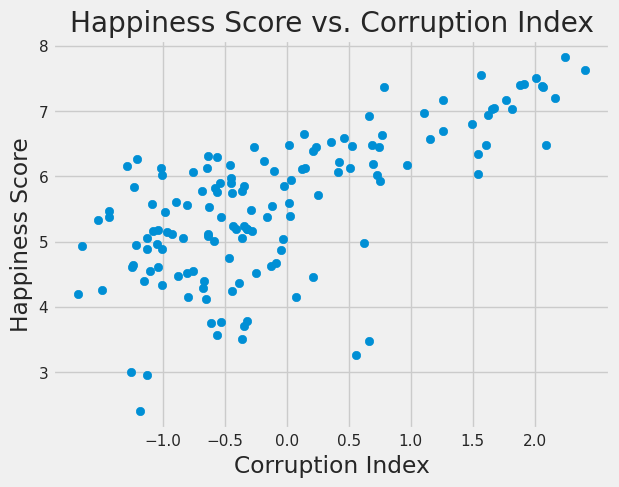

In [ ]:
# Happiness Score vs. Corruption Index
plt.scatter(final_df["corruption"].dropna(), final_df["happiness"])
plt.xlabel("Corruption Index") #could also make this two variables
plt.xticks(np.arange(-1, 2.5, 0.5))
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs. Corruption Index")
plt.show()

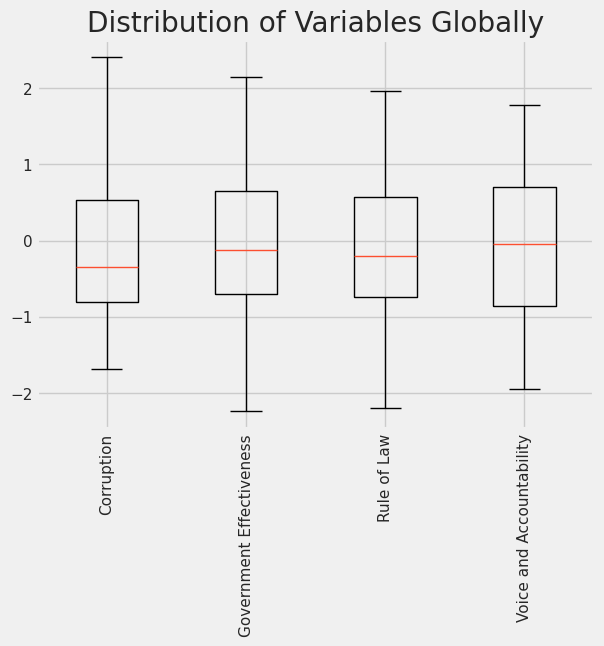

In [ ]:
# Distribution of Index Variables (doesn't matter though because variables are pre-standardized)
corruption_b = final_df.corruption.dropna()
gov_eff_b = final_df.government_effectiveness.dropna()
rule_law_b = final_df.rule_of_law.dropna()
voice_account_b = final_df.voice_accountability.dropna()
plt.boxplot([corruption_b, gov_eff_b, rule_law_b, voice_account_b], labels = ['Corruption', 'Government Effectiveness', 'Rule of Law', 'Voice and Accountability'])
plt.title("Distribution of Variables Globally")
plt.xticks(rotation=90)
plt.show()

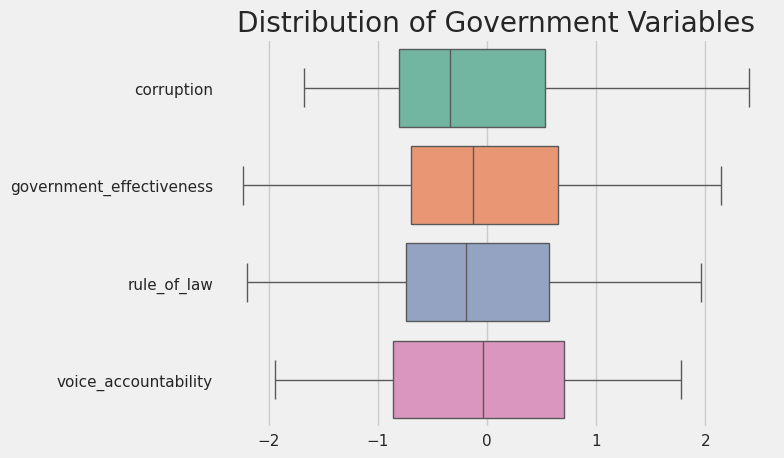

In [ ]:
# Try with Seaborn, https://www.geeksforgeeks.org/horizontal-boxplots-with-seaborn-in-python/
ax = sns.boxplot(data=[corruption_b, gov_eff_b, rule_law_b, voice_account_b], orient="h", palette="Set2")
ax.set(title = 'Distribution of Government Variables')
plt.show()

Median: 4.15385649390316
Q1 (25th percentile): 2.59965337755526
Q3 (75th percentile): 5.66881705315419
Outlier 1: Index Belarus, Value -4.6974497069539
Outlier 2: Index Moldova, Value -5.01548230938764
Outlier 3: Index Russia, Value -2.06971152527731
Outlier 4: Index Sri Lanka, Value -7.82397732646906
Outlier 5: Index Ukraine, Value -29.1
Outlier 6: Index Armenia, Value 12.6
Outlier 7: Index Georgia, Value 10.3934931637899
Outlier 8: Index Niger, Value 11.4896906228748
Outlier 9: Index Panama, Value 10.8093661181786


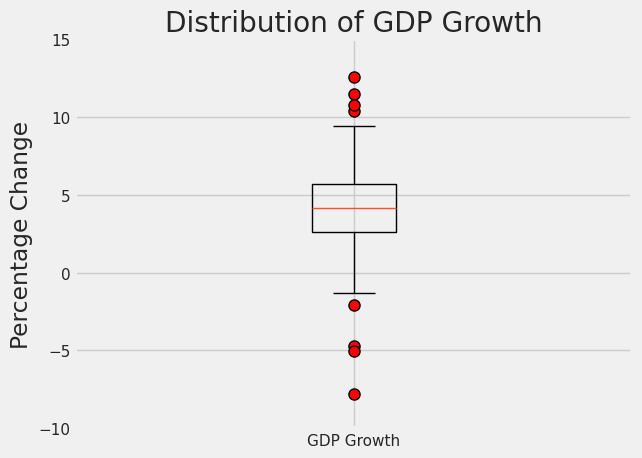

In [ ]:
# Add how other countries compare to the median, look at outliers

gdp_growth_b = final_df.gdp_growth.dropna()
trade_growth_b = final_df.trade_percentgdp.dropna()
boxplot_dict = plt.boxplot([gdp_growth_b], labels=['GDP Growth'], showfliers=True,
                           flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

median = boxplot_dict['medians'][0].get_ydata()[0]
q1 = boxplot_dict['boxes'][0].get_ydata().min()
q3 = boxplot_dict['boxes'][0].get_ydata().max()

print(f"Median: {median}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")

outliers = [flier.get_ydata() for flier in boxplot_dict['fliers']]
for i, outlier in enumerate(outliers[0]):
    index = gdp_growth_b[gdp_growth_b == outlier].index[0]
    print(f"Outlier {i + 1}: Index {index}, Value {outlier}")

plt.ylabel("Percentage Change")
plt.ylim(-10, 15)
plt.title('Distribution of GDP Growth')
plt.show()

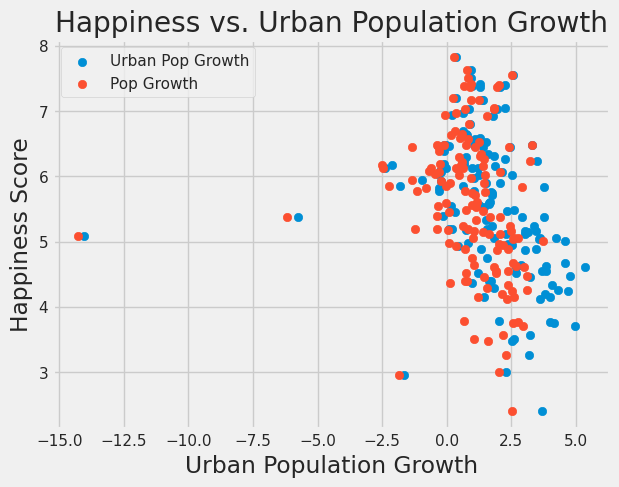

In [ ]:
# Happiness Score vs. Urban Population Growth
plt.scatter(final_df["urban_pop_growth"], final_df["happiness"], label = "Urban Pop Growth")
plt.scatter(final_df["pop_growth"], final_df["happiness"], label = "Pop Growth")
plt.legend()
plt.xlabel("Urban Population Growth")
plt.ylabel("Happiness Score")
plt.title("Happiness vs. Urban Population Growth")
plt.show()

In [ ]:
final_df.sort_values(by='urban_pop_growth', ascending = True).head(1)
#Interestingly, Ukraine has a much lower urban population growth compared to other countries (because of war/invasion of Ukraine?)

,age_dependency_ratio,consumer_protection_index,corruption,FDI,gdp_2015_usd,current_gdp,gdp_growth,gov_cons_exp,government_effectiveness,gross_domestic_savings,...,rule_of_law,rural_percentage,trade_percentgdp,urban_pop_percent,urban_pop_growth,voice_accountability,happiness,ladder,social_support,freedom
Country,,,,,,,,,,,,,,,,,,,,,
Ukraine,52.054971,380.318229,-0.633566,34000000.0,7.196290e+10,1.605027e+11,-29.1,38.235086,-0.496294,-6.713591e+09,...,-0.91878,30.081,87.706867,69.919,-14.025072,-0.024808,5.0841,4.637436,0.863068,0.829034


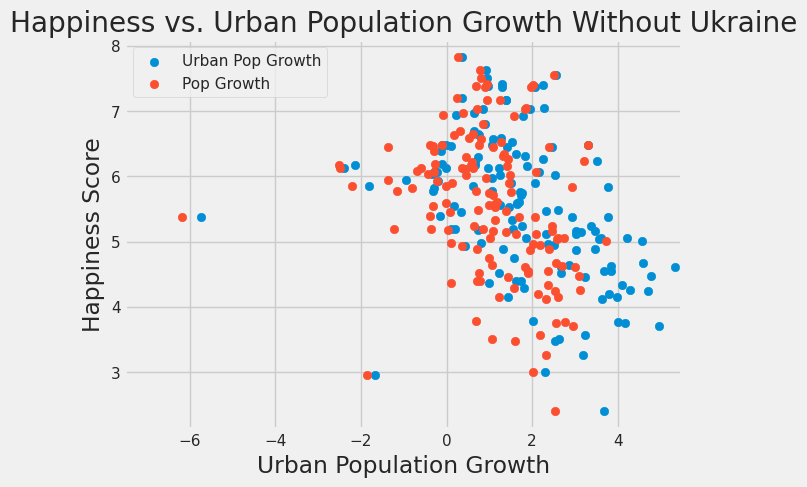

In [ ]:
# Happiness Score vs. Urban Population Growth without Ukraine
plt.scatter(final_df["urban_pop_growth"], final_df["happiness"], label = "Urban Pop Growth")
plt.scatter(final_df["pop_growth"], final_df["happiness"], label = "Pop Growth")
plt.legend()
plt.xlabel("Urban Population Growth") #could also make this two variables
plt.ylabel("Happiness Score")
plt.xlim(-7.5,5.5)
plt.title("Happiness vs. Urban Population Growth Without Ukraine")
plt.show()

In [ ]:
# Functions to calculate simple linear regression

def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)

def my_slope(x, y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return correlation(x, y)* np.std(y,ddof=1)/np.std(x,ddof=1)

def intercept(x, y):
    b1 = my_slope(x, y)
    return np.average(y) - b1 * np.average(x)

def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

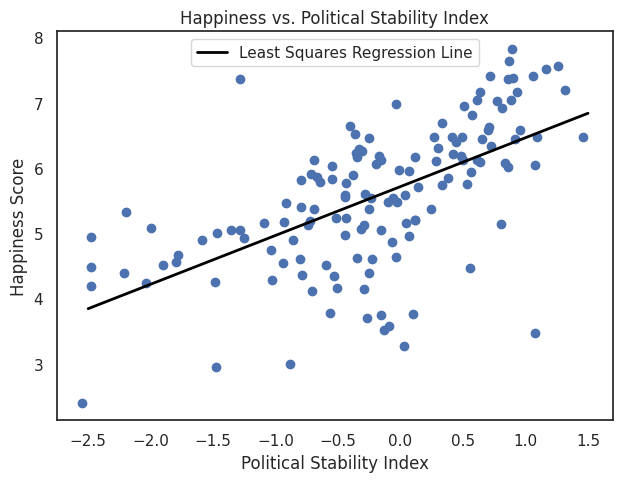

Slope:  0.7487097010004575 Y-Intercept:  5.714700674812865


In [ ]:
# Happiness vs. Political Stability

xlims = np.array([-2.5, 1.5])
pol_slope = my_slope(final_df['political_stability'], final_df['happiness'])
pol_intercept = intercept(final_df['political_stability'],final_df['happiness'])

plt.scatter(final_df["political_stability"].dropna(), final_df["happiness"])
plt.xlabel("Political Stability Index")
plt.ylabel("Happiness Score")
plt.plot(xlims, pol_slope * xlims + pol_intercept, lw=2, color='black', label = 'Least Squares Regression Line')
leg = plt.legend(loc='upper center')


plt.title("Happiness vs. Political Stability Index")
plt.show()
print("Slope: ", pol_slope, "Y-Intercept: ", pol_intercept)

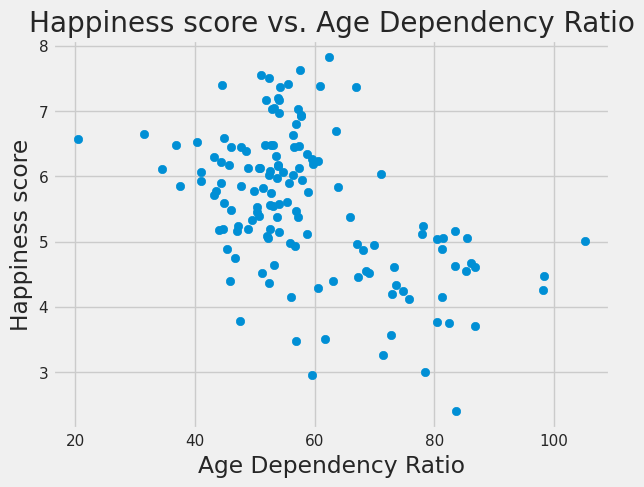

In [ ]:
# Happiness vs. Age Dependency Ratio
plt.scatter(final_df["age_dependency_ratio"], final_df.happiness)
plt.xlabel("Age Dependency Ratio")
plt.ylabel("Happiness score")
plt.title("Happiness score vs. Age Dependency Ratio")
plt.show()

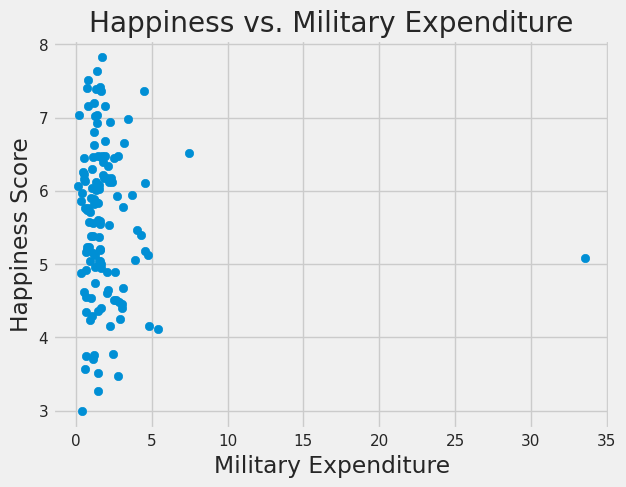

In [ ]:
# Happiness vs. Military Expenditure
plt.scatter(final_df["military_expenditure"], final_df.happiness)
plt.xlabel("Military Expenditure")
plt.ylabel("Happiness Score")
plt.title("Happiness vs. Military Expenditure")
plt.show()

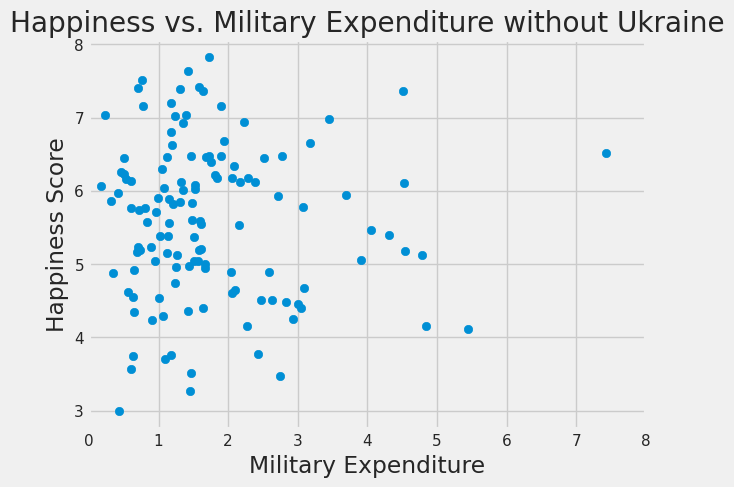

In [ ]:
# Happiness vs. Military Expenditure without Ukraine
plt.scatter(final_df["military_expenditure"], final_df.happiness)
plt.xlabel("Military Expenditure") #could also make this two variables
plt.ylabel("Happiness Score")
plt.title("Happiness vs. Military Expenditure without Ukraine")

plt.xlim(0, 8)
plt.show()

In [ ]:
final_df.sort_values(by='military_expenditure', ascending = False).head(1)
#again, Ukraine has the highest military expenditure (because of the war probably), maybe graph this without Ukraine?

,age_dependency_ratio,consumer_protection_index,corruption,FDI,gdp_2015_usd,current_gdp,gdp_growth,gov_cons_exp,government_effectiveness,gross_domestic_savings,...,rural_percentage,trade_percentgdp,urban_pop_percent,urban_pop_growth,voice_accountability,happiness,Life Ladder_x,Social support_x,Life Ladder_y,Social support_y
Country,,,,,,,,,,,,,,,,,,,,,
Ukraine,52.054971,380.318229,-0.633566,34000000.0,7.196290e+10,1.605027e+11,-29.1,38.235086,-0.496294,-6.713591e+09,...,30.081,87.706867,69.919,-14.025072,-0.024808,5.0841,4.637436,0.863068,4.637436,0.863068


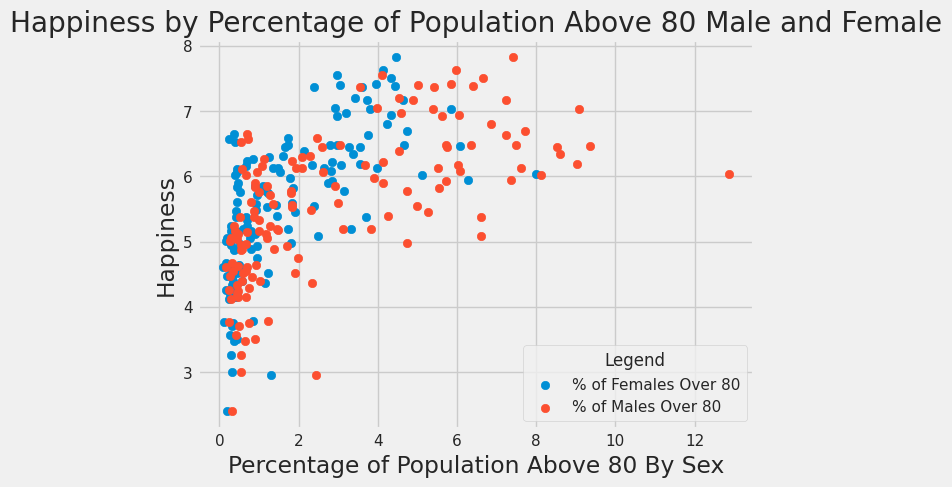

In [ ]:
# # Happiness vs. Percentage of Population over 80 (for males, females)
plt.scatter(final_df["pop_male_above_80"], final_df.happiness)
plt.scatter(final_df['pop_female_above_80'], final_df.happiness)
plt.xlabel("Percentage of Population Above 80 By Sex")
plt.ylabel("Happiness")
plt.title("Happiness by Percentage of Population Above 80 Male and Female")
plt.legend(["% of Females Over 80", "% of Males Over 80"], title = "Legend")
plt.show()

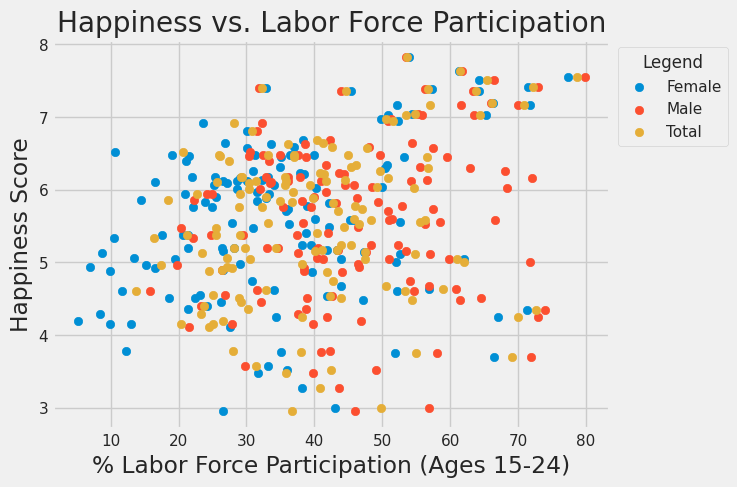

In [ ]:
# Happiness vs. Labor Force Participation
plt.scatter(final_df["labor_female_participation_15to24"], final_df['happiness'])
plt.scatter(final_df['labor_male_participation_15to24'], final_df.happiness)
plt.scatter(final_df['labor_total_participation_15to24'], final_df.happiness)
plt.xlabel("% Labor Force Participation (Ages 15-24)")
plt.ylabel("Happiness Score")
plt.title("Happiness vs. Labor Force Participation")
plt.legend(["Female", "Male", "Total"], title = "Legend", loc = 'upper left', bbox_to_anchor=(1,1))
plt.show()

# **Simple Linear Regression and Correlation**

In [ ]:
from scipy.optimize import minimize

In [ ]:
# Least squares line (minimizing MSE)
def line_mse(x,y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    def mse(a):
        estimate = a[0]*x + a[1] #with a[0] as slope and a[1] as y-intercept
        return (np.mean((y - estimate) ** 2))
    return minimize(mse,x0=[0,0],method="BFGS")

In [ ]:
# Happiness score as a function of corruption
corruption_line = line_mse(final_df.corruption,final_df["happiness"]).x
corruption_m = corruption_line[0]
corruption_b = corruption_line[1]
print("Happiness Score = ", corruption_m, "* Corruption +", corruption_b)

Happiness Score =  0.7844832354225487 * Corruption + 5.655843069919753


In [ ]:
def mse(a): #Function, output is the same as the least squares line before
    "Calculates MSE for given slope and intercept - input is an array or list"
    x = final_df['corruption']
    y = final_df['happiness']
    estimate = a[0]*x + a[1]
    return (np.mean((y - estimate) ** 2))
slope_mse = minimize(mse,x0=[0,0],method="BFGS").x[0]
b_mse = minimize(mse,x0=[0,0],method="BFGS").x[1]
print(slope_mse, b_mse)

0.7456169984552654 5.615273027573147


In [ ]:
# Standardizes units
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)

# Calculates correlation
def correlation(x, y):
    "Calculate the correlation between two arrays of real numbers."
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

**Create 'no_null_df' to drop columns that have "NA" values**

In [ ]:
# Drop columns that have any NAs
no_null_df = final_df.dropna(axis=1, how = 'any')
no_null_df.columns

Index(['age_dependency_ratio', 'corruption', 'government_effectiveness',
       'political_stability', 'pop_male_above_80', 'pop_female_above_80',
       'pop_growth', 'rule_of_law', 'voice_accountability', 'happiness'],
      dtype='object')

In [ ]:
# Correlation between happiness and corruption
correlation(no_null_df["corruption"], no_null_df["happiness"])

0.6773516057141938

In [ ]:
# # Correlation between happiness and rule of law
correlation(no_null_df["rule_of_law"], no_null_df["happiness"])

0.6880780176136323

In [ ]:
# Correlation between happiness and pop_male_above_80
correlation(no_null_df["pop_male_above_80"], no_null_df["happiness"])

0.6610892268717501

In [ ]:
# Correlation between happiness and population growth
correlation(no_null_df["pop_growth"], no_null_df["happiness"])

-0.17217928405586802

In [ ]:
# Correlation between happiness and age dependency ratio
correlation(no_null_df["age_dependency_ratio"], no_null_df["happiness"])

-0.4906709093945754

In [ ]:
# Print variable that has the highest absolute value r value and put them in an array
largest_corr = 0
influential_var = np.nan
array_pol = np.array([])
for i in np.arange(len(no_null_df.columns) - 1): #-1 because happiness can't be tested against itself
  temp_corr = correlation(no_null_df.iloc[:,i], no_null_df.happiness)
  array_pol = np.append(array_pol, temp_corr)
  if abs(temp_corr) > largest_corr:
    largest_corr = temp_corr
    influential_var = no_null_df.iloc[:,i].name
print(influential_var, " correlation r: ",largest_corr)
print("government effectiveness seems to be the most influential variable out", no_null_df.columns.to_list())

government_effectiveness  correlation r:  0.7354593917345021
government effectiveness seems to be the most influential variable out ['age_dependency_ratio', 'corruption', 'government_effectiveness', 'political_stability', 'pop_male_above_80', 'pop_female_above_80', 'pop_growth', 'rule_of_law', 'voice_accountability', 'happiness']


In [ ]:
array_pol

array([-0.49067091,  0.67735161,  0.73545939,  0.60470425,  0.66108923,
        0.6254608 , -0.17217928,  0.68807802,  0.62967763])

In [ ]:
index = np.array(['Age Dependency', 'Corruption', 'Government Effectiveness', 'Political Stability', 'pop_male_above_80', 'pop_female_above_80', 'pop_growth', 'Rule of Law', 'Voice and Accountability'])

In [ ]:
# Create a dataframe with correlation coefficient (r) and political variables
correlation_pol = pd.DataFrame(data = array_pol, index = index)
correlation_pol.rename(columns = {0:'Correlation Coefficient'}, inplace = True)
indices = np.array(['Corruption', 'Government Effectiveness', 'Political Stability', 'Rule of Law', 'Voice and Accountability'])
correlation_pol = correlation_pol.loc[indices]
correlation_pol

,Correlation Coefficient
Corruption,0.677352
Government Effectiveness,0.735459
Political Stability,0.604704
Rule of Law,0.688078
Voice and Accountability,0.629678


# **LASSO**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
'''
# First did this where I standardized only the features that the WDI had not done (they standardize on a scale -2.5 to 2.5)
no_null_df # df with null columns dropped

# Dropped columns...
X = no_null_df.drop('happiness', axis=1)
y = no_null_df['happiness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardizing specific columns that the WDI did not standardize themselves
need_scalar = ['age_dependency_ratio', 'pop_male_above_80', 'pop_female_above_80']

scaler = StandardScaler()
X_train[need_scalar] = scaler.fit_transform(X_train[need_scalar])
X_test[need_scalar] = scaler.transform(X_test[need_scalar])

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

test_score = lasso_model.score(X_test, y_test)
print(f'Testing R-squared: {test_score:.3f}')

coefficients = lasso_model.coef_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()

y_pred = lasso_model.predict(X_test)

# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='coral')
plt.xlabel('Actual Happiness')
plt.ylabel('Predicted Happiness')
plt.title('Actual vs. Predicted Happiness (Test Set)')
plt.show()
'''

"\n# First did this where I standardized only the features that the WDI had not done (they standardize on a scale -2.5 to 2.5)\nno_null_df # df with null columns dropped\n\n# Dropped columns...\nX = no_null_df.drop('happiness', axis=1)\ny = no_null_df['happiness']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# standardizing specific columns that the WDI did not standardize themselves\nneed_scalar = ['age_dependency_ratio', 'pop_male_above_80', 'pop_female_above_80']\n\nscaler = StandardScaler()\nX_train[need_scalar] = scaler.fit_transform(X_train[need_scalar])\nX_test[need_scalar] = scaler.transform(X_test[need_scalar])\n\nlasso_model = Lasso(alpha=0.01)\nlasso_model.fit(X_train, y_train)\n\ntest_score = lasso_model.score(X_test, y_test)\nprint(f'Testing R-squared: {test_score:.3f}')\n\ncoefficients = lasso_model.coef_\nfeature_names = X_train.columns\n\nplt.figure(figsize=(10, 6))\nplt.barh(feature_names, coefficients, color='skyblue')\

Testing R-squared: 0.659


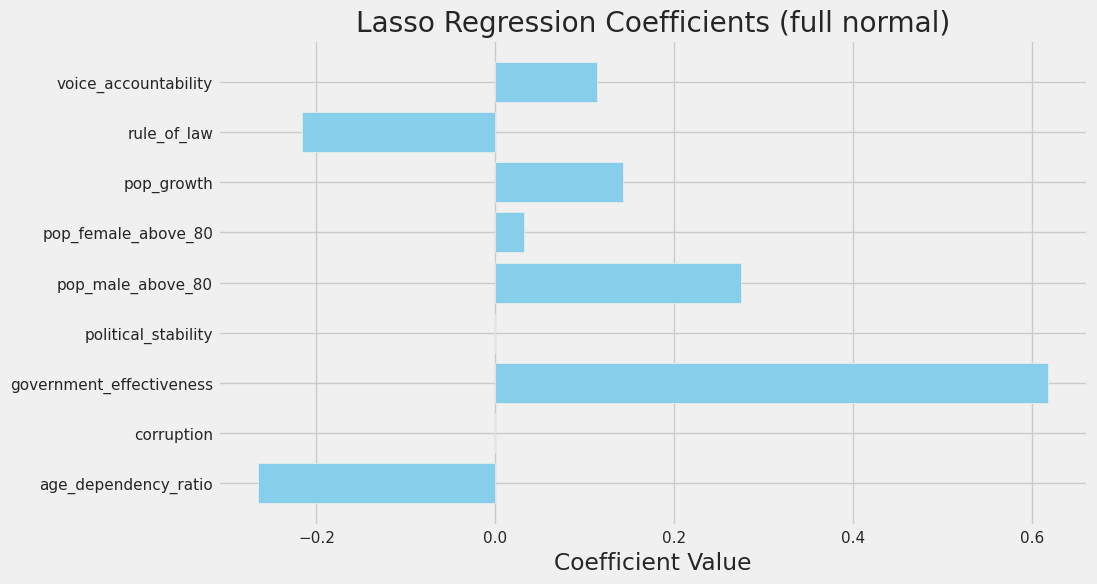

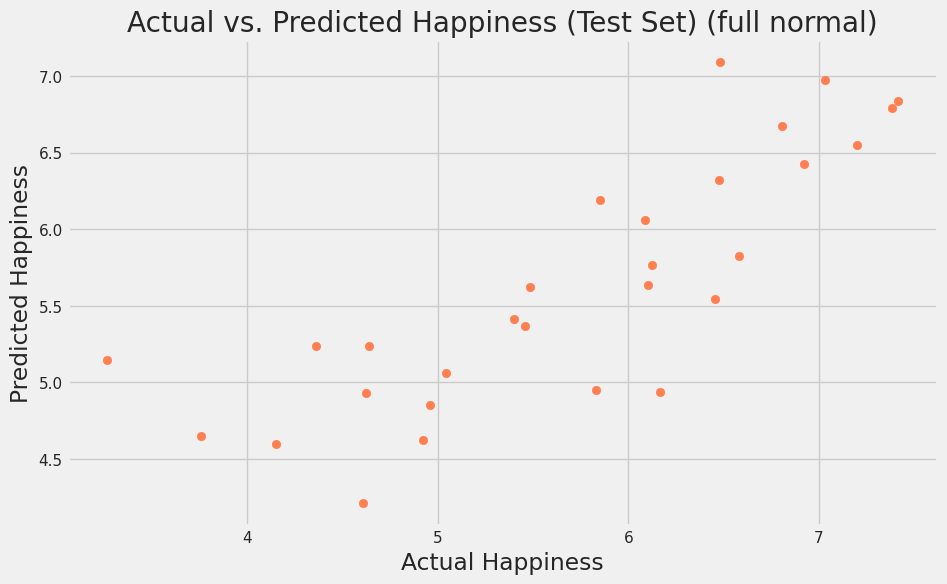

In [ ]:
# A second time to standardize everything down to the same scale (regardless of WDI standardization) -- this shows little difference

X = no_null_df.drop('happiness', axis=1)
y = no_null_df['happiness']

# split the data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_standardized, y_train)

test_score = lasso_model.score(X_test_standardized, y_test)
print(f'Testing R-squared: {test_score:.3f}')

coefficients = lasso_model.coef_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients (full normal)')
plt.show()

y_pred = lasso_model.predict(X_test_standardized)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='coral')
plt.xlabel('Actual Happiness')
plt.ylabel('Predicted Happiness')
plt.title('Actual vs. Predicted Happiness (Test Set) (full normal)')
plt.show()


Testing R-squared: 0.623


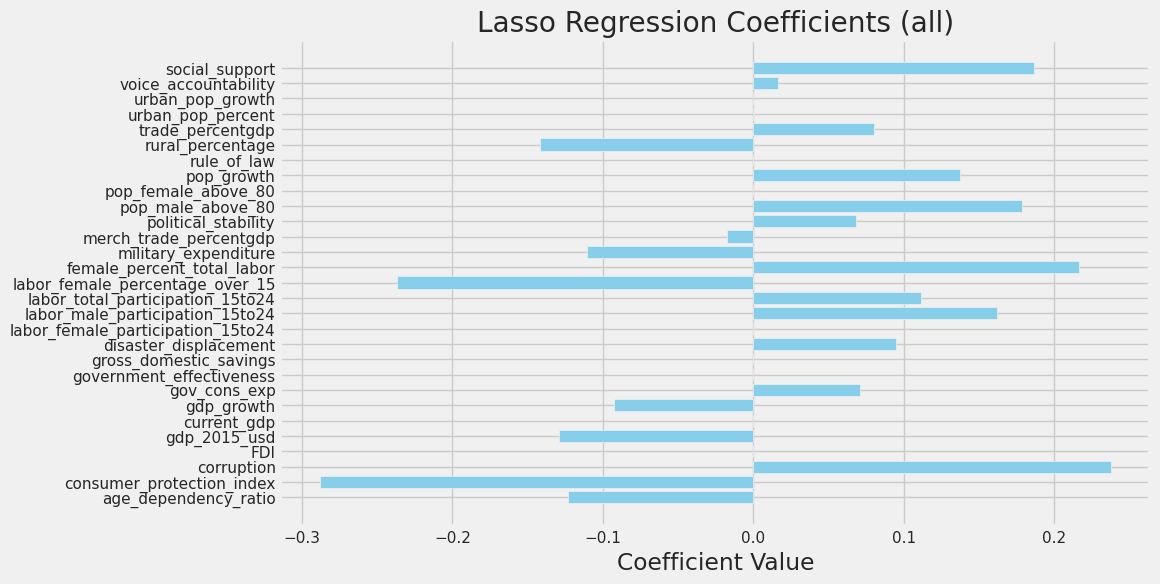

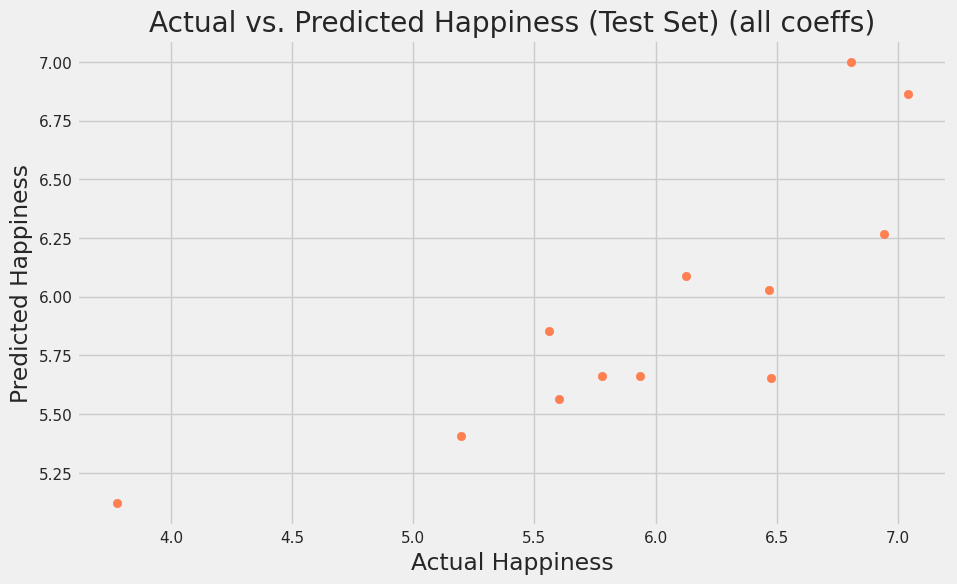

In [ ]:
# Let's try to maximize coefficients now instead of countries... this leaves us with less data, but more features
row_drop = final_df.dropna()
row_drop = row_drop.drop(columns='ladder')

X = row_drop.drop('happiness', axis=1)
y = row_drop['happiness']

# split the data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_standardized, y_train)

test_score = lasso_model.score(X_test_standardized, y_test)
print(f'Testing R-squared: {test_score:.3f}')

coefficients = lasso_model.coef_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients (all)')
plt.show()

y_pred = lasso_model.predict(X_test_standardized)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='coral')
plt.xlabel('Actual Happiness')
plt.ylabel('Predicted Happiness')
plt.title('Actual vs. Predicted Happiness (Test Set) (all coeffs)')
plt.show()


In [ ]:
'''
# Let's split up by social, political, and economic features and see the strongest coefficients in each of those groups
row_drop = final_df.dropna()
social_df = row_drop[['freedom','labor_total_participation_15to24','pop_male_above_80','pop_female_above_80','pop_growth','rural_percentage','social_support','urban_pop_percent','urban_pop_growth','happiness']]
political_df = row_drop[['corruption', 'government_effectiveness', 'military_expenditure','political_stability','rule_of_law','voice_accountability','happiness']]
economic_df = row_drop[['age_dependency_ratio', 'consumer_protection_index','FDI', 'gdp_2015_usd', 'current_gdp', 'gdp_growth', 'gov_cons_exp', 'gross_domestic_savings','merch_trade_percentgdp', 'trade_percentgdp','happiness']]
'''

"\n# Let's split up by social, political, and economic features and see the strongest coefficients in each of those groups\nrow_drop = final_df.dropna()\nsocial_df = row_drop[['freedom','labor_total_participation_15to24','pop_male_above_80','pop_female_above_80','pop_growth','rural_percentage','social_support','urban_pop_percent','urban_pop_growth','happiness']]\npolitical_df = row_drop[['corruption', 'government_effectiveness', 'military_expenditure','political_stability','rule_of_law','voice_accountability','happiness']]\neconomic_df = row_drop[['age_dependency_ratio', 'consumer_protection_index','FDI', 'gdp_2015_usd', 'current_gdp', 'gdp_growth', 'gov_cons_exp', 'gross_domestic_savings','merch_trade_percentgdp', 'trade_percentgdp','happiness']]\n"

Testing R-squared: 0.556


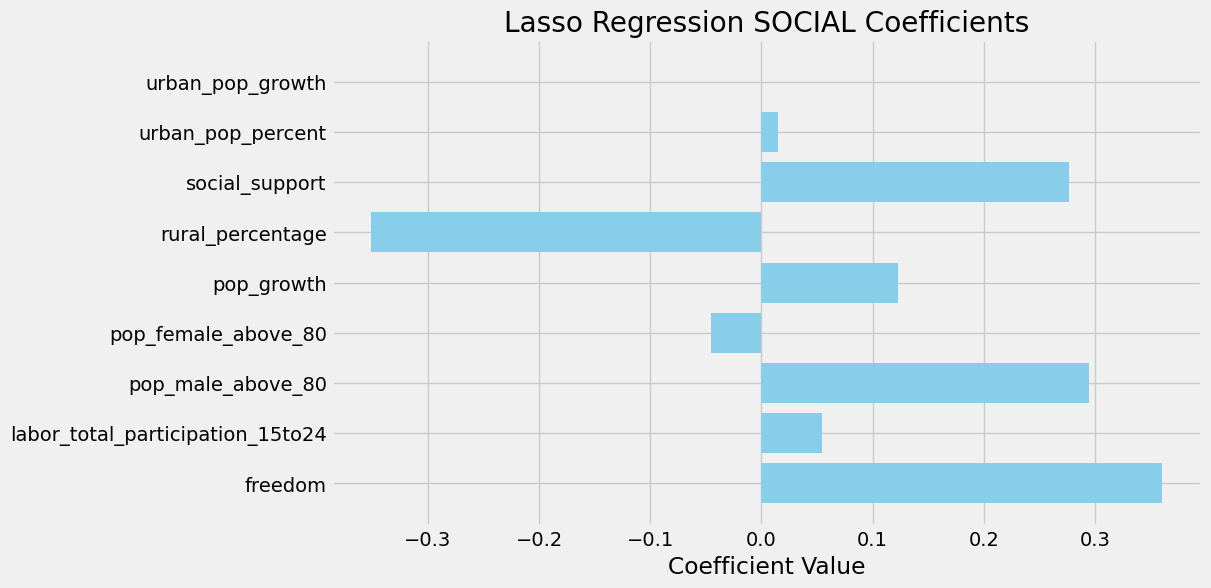

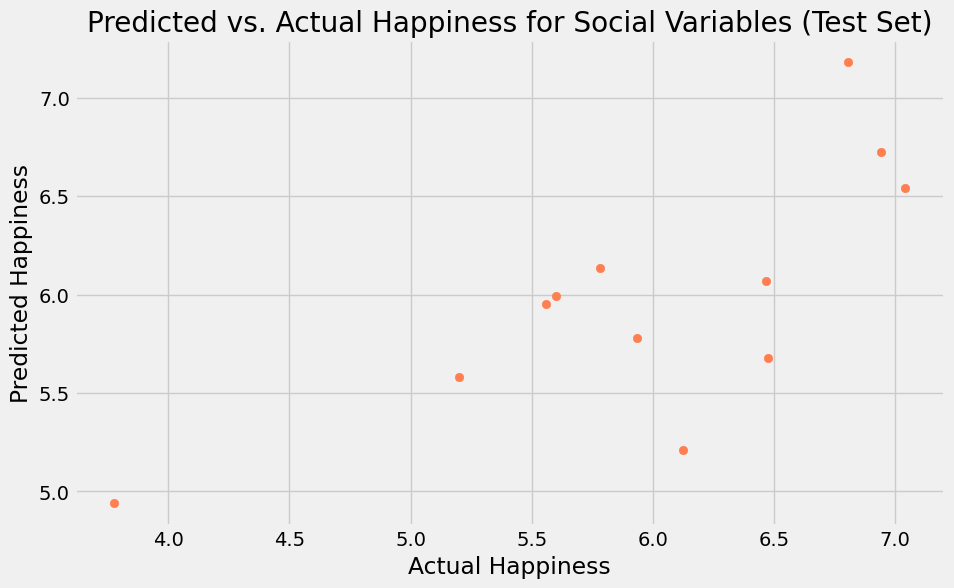

In [ ]:
# First with social features
X = social_df.drop('happiness', axis=1)
y = social_df['happiness']

# split the data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_standardized, y_train)

test_score = lasso_model.score(X_test_standardized, y_test)
print(f'Testing R-squared: {test_score:.3f}')

coefficients = lasso_model.coef_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression SOCIAL Coefficients')
plt.show()

y_pred = lasso_model.predict(X_test_standardized)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='coral')
plt.xlabel('Actual Happiness')
plt.ylabel('Predicted Happiness')
plt.title('Predicted vs. Actual Happiness for Social Variables (Test Set)')
plt.show()

Testing R-squared: 0.532


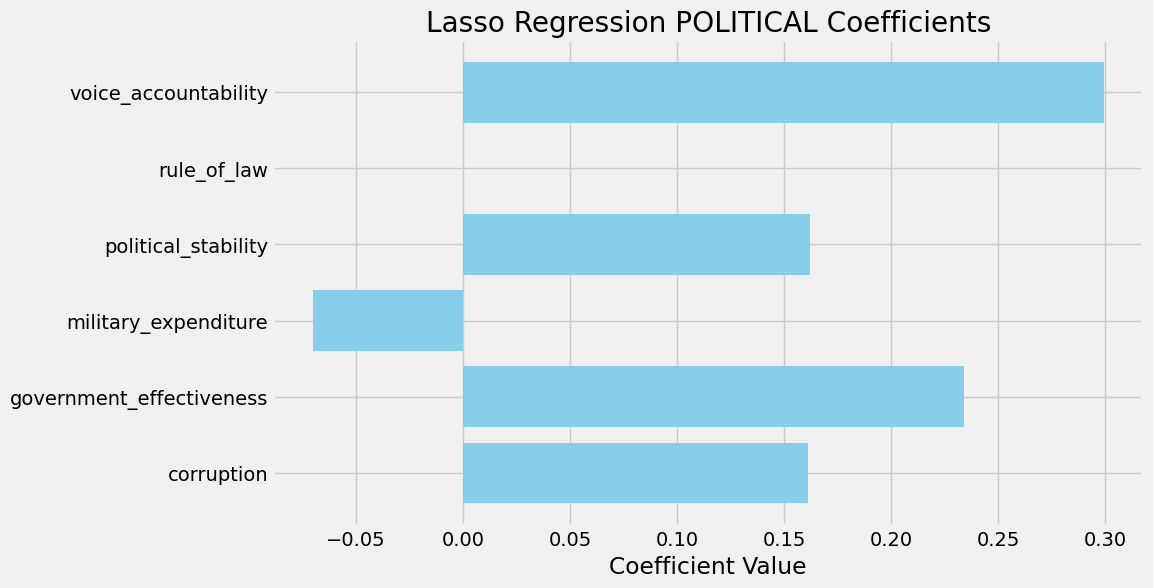

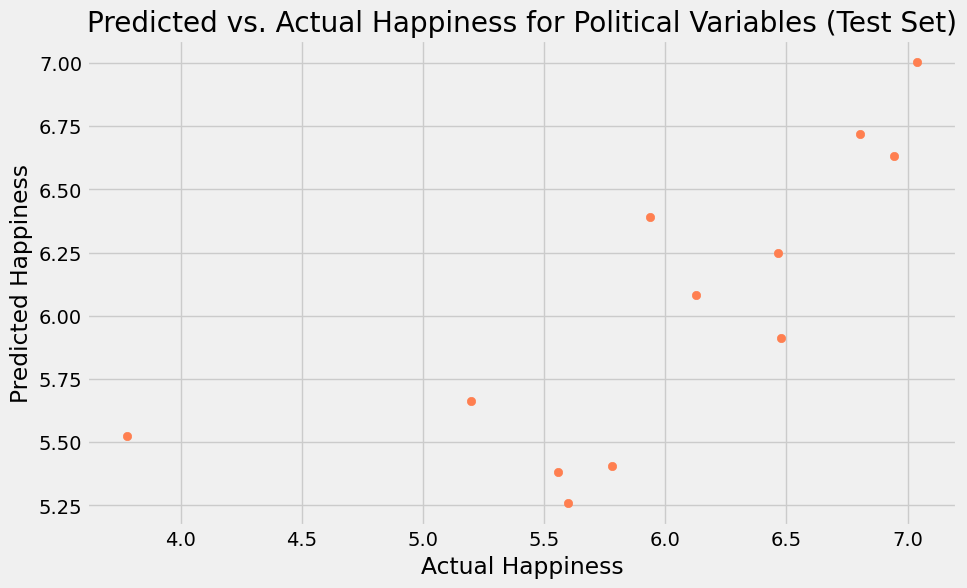

In [ ]:
# Next with political features
X = political_df.drop('happiness', axis=1)
y = political_df['happiness']

# split the data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_standardized, y_train)

test_score = lasso_model.score(X_test_standardized, y_test)
print(f'Testing R-squared: {test_score:.3f}')

coefficients = lasso_model.coef_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression POLITICAL Coefficients')
plt.show()

y_pred = lasso_model.predict(X_test_standardized)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='coral')
plt.xlabel('Actual Happiness')
plt.ylabel('Predicted Happiness')
plt.title('Predicted vs. Actual Happiness for Political Variables (Test Set)')
plt.show()

Testing R-squared: -0.037


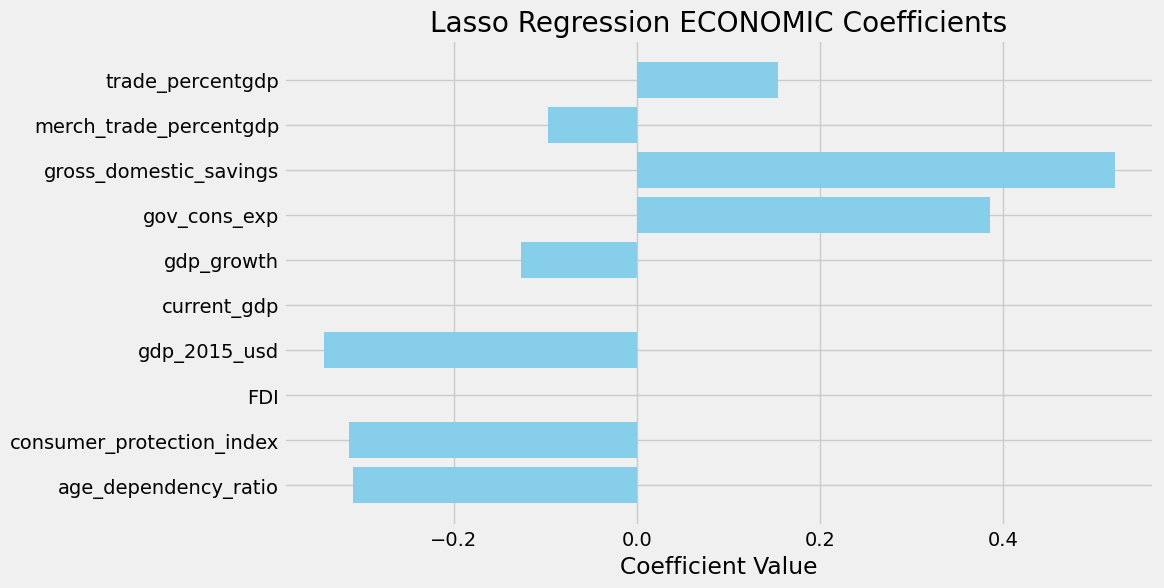

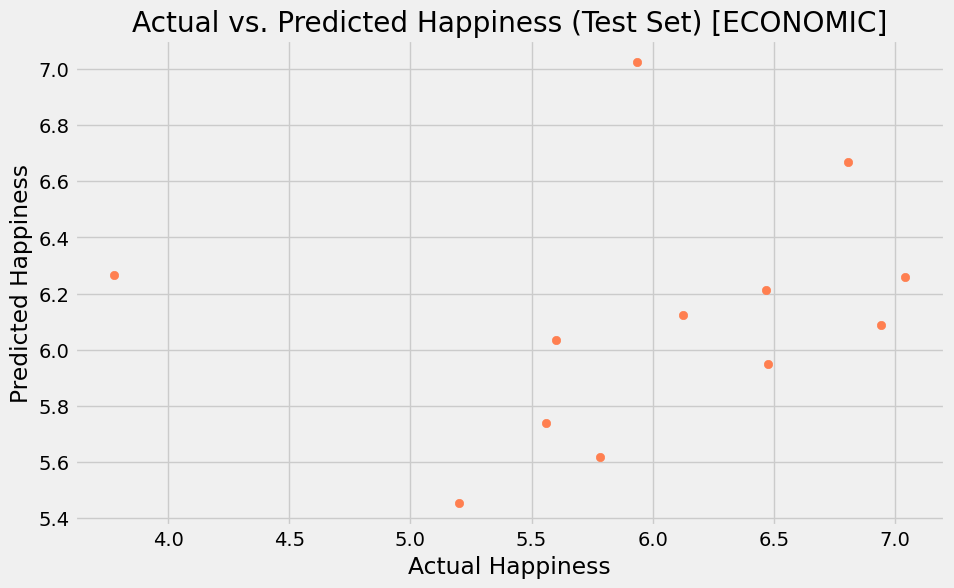

In [ ]:
# finally with economic features
X = economic_df.drop('happiness', axis=1)
y = economic_df['happiness']

# split the data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_standardized, y_train)

test_score = lasso_model.score(X_test_standardized, y_test)
print(f'Testing R-squared: {test_score:.3f}')

coefficients = lasso_model.coef_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression ECONOMIC Coefficients')
plt.show()

y_pred = lasso_model.predict(X_test_standardized)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='coral')
plt.xlabel('Actual Happiness')
plt.ylabel('Predicted Happiness')
plt.title('Actual vs. Predicted Happiness (Test Set) [ECONOMIC]')
plt.show()

# **Binarization and Classification via kNN (with Cross Validation)**

In [ ]:
# Binarization to classify countries based on whether they are below or above the median happiness score
happiness_median = no_null_df["happiness"].median()
no_null_df['Happiness_Bin'] = no_null_df.apply(lambda x: 1 if x['happiness']>happiness_median else 0, axis = 1)
no_null_df

<ipython-input-104-b04694ef9c10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_df['Happiness_Bin'] = no_null_df.apply(lambda x: 1 if x['happiness']>happiness_median else 0, axis = 1)


,age_dependency_ratio,corruption,government_effectiveness,political_stability,pop_male_above_80,pop_female_above_80,pop_growth,rule_of_law,voice_accountability,happiness,Happiness_Bin
Country,,,,,,,,,,,
Afghanistan,83.570360,-1.183776,-1.879552,-2.550802,0.205594,0.319730,2.534498,-1.658442,-1.751587,2.4038,0
Albania,48.813511,-0.407876,0.065063,0.114945,3.321840,3.828130,-1.215790,-0.165779,0.139466,5.1988,0
Algeria,58.808385,-0.637930,-0.513090,-0.741772,0.903125,1.178178,1.628339,-0.832473,-1.003874,5.1223,0
Argentina,53.779107,-0.447030,-0.282877,-0.009163,1.792317,3.915125,0.925835,-0.480682,0.543527,5.9670,1
Armenia,50.661526,0.028035,-0.314230,-0.797184,1.462828,4.262768,-0.377102,-0.168567,0.088234,5.3986,0
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,56.697454,-1.651137,-1.688181,-1.256462,0.956126,1.720697,0.360447,-2.197214,-1.533926,4.9255,0
Vietnam,46.000524,-0.287283,0.175491,-0.030565,0.928953,2.310682,0.734794,-0.158443,-1.288703,5.4850,0
Yemen,72.889150,-1.679558,-2.232542,-2.476880,0.259102,0.447509,2.144628,-1.849667,-1.618616,4.1969,0


In [ ]:
happiness_median = no_null_df["happiness"].median()
happiness_median

5.585299968719482

In [ ]:
shuffled_df = no_null_df.sample(frac = 1) #reshuffle the whole thing, probably should combine more data
len(shuffled_df) #141 total values, let's do a 70/30 split
test = shuffled_df.head(41)
train = shuffled_df.tail(100)

In [ ]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    print(np.std(x,ddof=1))
    print(np.average(x))
    return (x - np.average(x))/np.std(x,ddof=1)

# Don't need standardization for index variables, because this data is mostly standardized and pre-processed

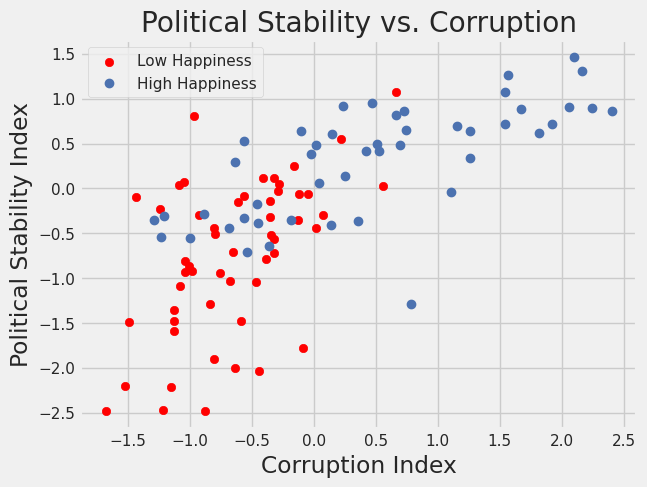

In [ ]:
# A visualization of the above (just one example of corruption and political stability), don't necessarily need this but it indicates happier countries have good corruption and political stability scores
plt.scatter(train[train["Happiness_Bin"]==0]['corruption'],train[train["Happiness_Bin"]==0]['political_stability'],
              color="red",label="Low Happiness")
plt.plot(train[train["Happiness_Bin"]==1]['corruption'],train[train["Happiness_Bin"]==1]['political_stability'],
           'bo',label="High Happiness")
plt.xlabel('Corruption Index')
plt.ylabel('Political Stability Index')
plt.title("Political Stability vs. Corruption")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Weight the happiness because the datas are even
no_null_df["Happiness_Bin"].value_counts()
#roughly even, no need to weight (71 vs 70)

0    71
1    70
Name: Happiness_Bin, dtype: int64

In [ ]:
# the Euclidean distance
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def all_distances(X_train, point):
    """The distance between point (an array of numbers) and the numbers in row i of attribute data frame."""
    attributes = X_train.copy()
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point,axis=1)

def closest(X_train, Y_train, point, k):
    """A df containing the k closest rows in the training df to array 'point' """
    attributes=X_train.copy()
    attributes['Distance']=all_distances(attributes, point)
    attributes['Class']=Y_train
    attributes=attributes.sort_values('Distance')
    topk = attributes.head(k)
    return topk

def majority(topkclasses, num_class):
      ones = topkclasses[topkclasses.Class==1].shape[0]
      zeros = topkclasses[topkclasses.Class==0].shape[0]
      if ones > zeros:
          return 1
      else:
          return 0

# returns a data frame with X_test appended by a column of Class prediction
def classify(X_train,Y_train, X_test, k):
    """Classify data in X_test using k-nearest neighbor classification with the given training table."""
    n=X_test.shape[0] # the number of test cases

    #my addition to calculate the number of classes
    num_class = len(np.unique(Y_train))

    pred_class = np.array([])
    for i in np.arange(n):
        topkclasses = closest(X_train,Y_train, X_test.iloc[i], k)
        pred_class = np.append(pred_class,majority(topkclasses, num_class))

    report_df=X_test.copy()
    report_df['Class']=pred_class

    return report_df

In [ ]:
# All of these variables are standardized, create training and testing datasets
X_train=train[['corruption', 'political_stability', 'government_effectiveness', 'rule_of_law', 'voice_accountability']]
X_test=test[['corruption', 'political_stability', 'government_effectiveness', 'rule_of_law', 'voice_accountability']]
Y_train=train.Happiness_Bin
Y_test=test.Happiness_Bin

In [ ]:
res_df = classify(X_train,Y_train, X_test, 4) #Classify with k of 4

**Cross Validation**

In [ ]:
Y_test==res_df.Class

Country
Australia                True
Armenia                  True
Moldova                  True
Switzerland              True
Madagascar              False
Kuwait                  False
Dominican Republic      False
Georgia                  True
Kosovo                  False
Nigeria                  True
Slovakia                 True
United Kingdom           True
Spain                    True
Mexico                  False
Ecuador                  True
Uruguay                  True
Canada                   True
Afghanistan              True
Cambodia                 True
Senegal                  True
Nepal                    True
Uzbekistan              False
Belarus                 False
Argentina               False
Luxembourg               True
Tunisia                  True
Tajikistan               True
South Korea              True
Belgium                  True
El Salvador             False
Eswatini, Kingdom of     True
Zambia                   True
Norway                   True
In

In [ ]:
np.mean(res_df.Class==Y_test) #accuracy is around 74%

0.7560975609756098

In [ ]:
#try other ks
res_df_3 = classify(X_train,Y_train, X_test, 3) #k of 3
np.mean(res_df_3.Class==Y_test) #accuracy is around 74%

0.7317073170731707

In [ ]:
res_df_5 = classify(X_train,Y_train, X_test, 5) #k of 5
np.mean(res_df_5.Class==Y_test) #accuracy is around 76%

0.7804878048780488

In [ ]:
# Repeat the simulation
def sim_repeat(n,k):
    accuracy = np.array([])
    for i in np.arange(n):
        sim_perm=no_null_df.sample(frac=1)
        train = shuffled_df.head(42)
        test = shuffled_df.head(100)
        X_train=train[['corruption', 'political_stability', 'government_effectiveness', 'rule_of_law', 'voice_accountability']]
        X_test=test[['corruption', 'political_stability', 'government_effectiveness', 'rule_of_law', 'voice_accountability']]
        Y_train=train.Happiness_Bin
        Y_test=test.Happiness_Bin
        accuracy=np.append(accuracy,sum(classify(X_train,Y_train, X_test, k).Class==Y_test))
    return(sum(accuracy)/(100*n))

In [ ]:
sim_repeat(20,3)

0.77

In [ ]:
sim_repeat(20,4)

0.76

In [ ]:
sim_repeat(20,5)

0.7

# **Clustering (did not use in report)**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

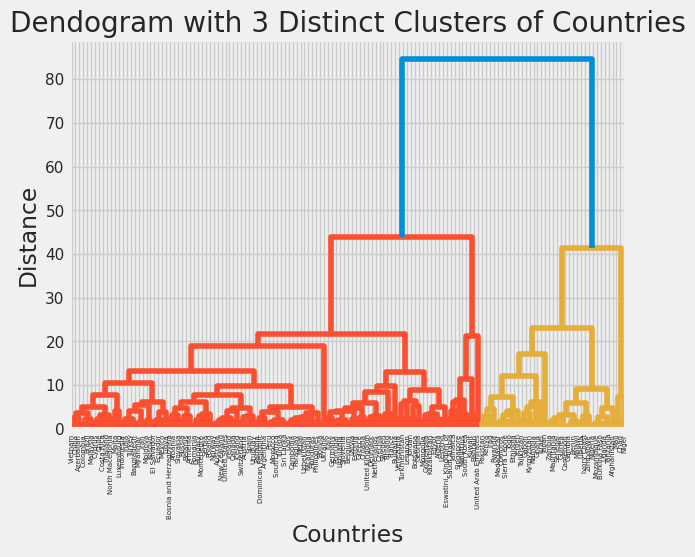

In [ ]:
clust1 = linkage(no_null_df, method='complete', metric='euclidean') #complete linkage, euclidean distance
dendrogram(clust1, labels = no_null_df['happiness'].index,
            orientation='top',
            distance_sort='descending')
plt.title("Dendogram with 3 Distinct Clusters of Countries")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

In [ ]:
clusters = fcluster(clust1, 4, criterion='maxclust') #find four clusters
clusters

array([2, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       1, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2,
       4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 3, 2, 4, 4, 2, 3,
       4, 3, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 1, 4, 2, 3, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 1, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       3, 2, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 3,
       4, 4, 4, 4, 4, 4, 2, 2, 2], dtype=int32)

In [ ]:
country_names = no_null_df.index.values #create array with state names
cluster_one_index = np.where(clusters == 1)[0] #find indices when clusters = 1
cluster_two_index = np.where(clusters == 2)[0] #find indices when clusters = 2
cluster_three_index = np.where(clusters == 3)[0] #find indices when clusters = 3
cluster_four_index = np.where(clusters == 4)[0] #find indices when clusters = 4

#find state names using indices
print("Cluster One: ", country_names[cluster_one_index])
print("Cluster Two: ", country_names[cluster_two_index])
print("Cluster Three: ", country_names[cluster_three_index])
print("Cluster Four: ", country_names[cluster_four_index])

Cluster One:  ['Chad' 'Mali' 'Niger']
Cluster Two:  ['Afghanistan' 'Benin' 'Burkina Faso' 'Cameroon' 'Comoros' 'Ivory Coast'
 'Ethiopia' 'Gabon' 'Gambia' 'Ghana' 'Guinea' 'Iraq' 'Israel' 'Japan'
 'Kenya' 'Kyrgyzstan' 'Liberia' 'Madagascar' 'Malawi' 'Mauritania'
 'Mozambique' 'Namibia' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'Tajikistan' 'Tanzania' 'Togo' 'Uganda' 'Yemen' 'Zambia'
 'Zimbabwe']
Cluster Three:  ['Bahrain' 'Jamaica' 'South Korea' 'Kuwait' 'Mauritius' 'Saudi Arabia'
 'Singapore' 'United Arab Emirates']
Cluster Four:  ['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Cambodia'
 'Canada' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Eswatini, Kingdom of' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Guatemala' 'Honduras' 'Hungary' 

# **K-Means**

In [ ]:
#Functions necessary for k-Means

def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def compute_distance(df, centroids):
    K=centroids.shape[0]
    distances_ar = np.zeros((df.shape[0], K))
    for k in range(K):
        point=centroids.iloc[k]
        def distance_from_point(row):
            return distance(point, np.array(row))
        distances_ar[:,k] = df.apply(distance_from_point,axis=1).values
    return distances_ar

def compute_sse(df, labels, centroids,K):
    distances_ar = np.zeros(df.shape[0])
    for k in range(K):
        point=centroids.iloc[k]
        def distance_from_point(row):
            return distance(point, np.array(row))
        distances_ar[labels == k] = df[labels == k].apply(distance_from_point,axis=1).values
    return np.sum(distances_ar)

def compute_centroids(df, labels, K):
        centroids = np.zeros((K, df.shape[1]))
        for k in range(K):
            centroids[k, :] = df[labels == k].mean()
        return centroids

def initialize_centroids(df,K):
    random_ids = np.random.permutation(df.shape[0])
    centroids = df.iloc[random_ids[:K]]
    return centroids

def Kmeans(df,K,max_iter):
    #define the maximum number of iterations
    # max_iter=20

    #initialize centroids
    centroids=initialize_centroids(df,K)

    for i in range(max_iter):
            old_centroids = centroids
            dist_matrix = compute_distance(df, old_centroids)
            clust=np.argmin(dist_matrix, axis=1)
            print(compute_sse(df,clust,old_centroids,K))
            centroids = pd.DataFrame(compute_centroids(df,clust,K))

    # return the centroids
    return centroids

def Kmeans_sse(df,K):
    #define the maximum number of iterations
    max_iter=20

    #initialize centroids
    centroids=initialize_centroids(df,K)

    for i in range(max_iter):
            old_centroids = centroids
            dist_matrix = compute_distance(df, old_centroids)
            clust=np.argmin(dist_matrix, axis=1)
            #print(compute_sse(df,clust,old_centroids,K))
            centroids = pd.DataFrame(compute_centroids(df,clust,K))

    # return SSE
    return compute_sse(df,clust,centroids,K)

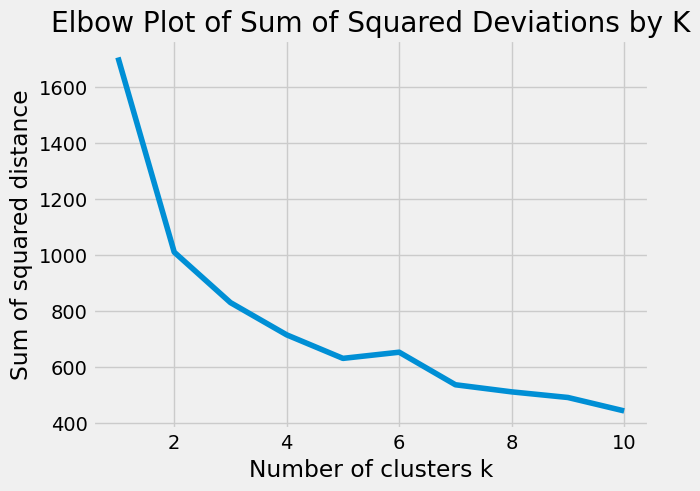

In [ ]:
# Elbow plot to calculate sum of squared deviations and compare them to K, based on all variables except happiness

K=np.arange(1,11)
sse=np.zeros(10)
for k in K:
    sse[k-1]=Kmeans_sse(no_null_df.drop(columns = ['happiness', 'Happiness_Bin']),k)
plt.plot(K,sse[0:10])
plt.xlabel('Number of clusters k')
plt.title('Elbow Plot of Sum of Squared Deviations by K')
plt.ylabel('Sum of squared distance');

In [ ]:
# Good number of clusters is approximately 5

In [ ]:
centr = Kmeans(no_null_df.drop(columns = ['happiness', 'Happiness_Bin']), 5, 5)
dist_matrix=compute_distance(no_null_df.drop(columns = ['happiness', 'Happiness_Bin']), centr)
cluster_k_means =np.argmin(dist_matrix, axis=1)
cluster_k_means

1070.8470472046433
766.9661233881088
738.1416928031668
728.4909374676238
714.1128605353825


array([2, 3, 1, 4, 3, 4, 4, 0, 0, 3, 3, 4, 2, 3, 3, 4, 0, 4, 2, 3, 2, 4,
       2, 0, 0, 0, 2, 0, 2, 4, 0, 4, 4, 3, 3, 1, 3, 4, 1, 2, 1, 1, 1, 2,
       4, 4, 1, 4, 1, 2, 3, 4, 4, 3, 3, 3, 1, 4, 1, 4, 0, 1, 4, 1, 1, 0,
       3, 0, 1, 3, 4, 1, 1, 2, 3, 4, 0, 2, 2, 0, 2, 3, 2, 0, 3, 3, 1, 4,
       3, 2, 3, 1, 3, 4, 4, 3, 2, 2, 0, 4, 1, 3, 3, 3, 3, 4, 4, 4, 3, 1,
       0, 2, 4, 1, 0, 3, 4, 3, 4, 3, 1, 4, 1, 2, 0, 2, 3, 3, 3, 2, 4, 0,
       4, 4, 4, 3, 4, 3, 2, 2, 2])

In [ ]:
country_names = no_null_df.index
country_names

Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=141)

In [ ]:
cluster_one_k = np.where(cluster_k_means == 0)[0]
cluster_two_k = np.where(cluster_k_means == 1)[0]
cluster_three_k = np.where(cluster_k_means == 2)[0]
cluster_four_k = np.where(cluster_k_means == 3)[0]
cluster_five_k = np.where(cluster_k_means == 4)[0]

#find state names using indices
print("Clusters based on World Bank Variables")
print("Cluster One: ", country_names[cluster_one_k])
print("Cluster Two: ", country_names[cluster_two_k])
print("Cluster Three: ", country_names[cluster_three_k])
print("Cluster Four: ", country_names[cluster_four_k])
print("Cluster Five: ", country_names[cluster_five_k])

Clusters based on World Bank Variables
Cluster One:  Index(['Azerbaijan', 'Bahrain', 'Brazil', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Cyprus', 'Jamaica', 'South Korea', 'Kuwait',
       'Luxembourg', 'Malaysia', 'Mauritius', 'North Macedonia',
       'Saudi Arabia', 'Singapore', 'Thailand', 'United Arab Emirates'],
      dtype='object', name='Country')
Cluster Two:  Index(['Algeria', 'Egypt', 'Eswatini, Kingdom of', 'Finland', 'France',
       'Gabon', 'Ghana', 'Guatemala', 'Iraq', 'Israel', 'Japan', 'Kazakhstan',
       'Kenya', 'Kyrgyzstan', 'Lebanon', 'Lesotho', 'Mongolia', 'Namibia',
       'Pakistan', 'Rwanda', 'Sierra Leone', 'Sweden', 'Tajikistan'],
      dtype='object', name='Country')
Cluster Three:  Index(['Afghanistan', 'Benin', 'Burkina Faso', 'Cameroon', 'Chad', 'Comoros',
       'Ivory Coast', 'Ethiopia', 'Gambia', 'Guinea', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria',
       'Senegal', 'Tanzania', 'Togo', 

In [ ]:
# Graph by clusters based on the clusters from k-means

# Add cluster as a variable to the no_null_df
for i in np.arange(len(no_null_df)):
  country_name = no_null_df.index[i]
  if country_name in country_names[cluster_one_k]:
      no_null_df.loc[country_name, 'Cluster'] = 1
  elif country_name in country_names[cluster_two_k]:
      no_null_df.loc[country_name, 'Cluster'] = 2
  elif country_name in country_names[cluster_three_k]:
      no_null_df.loc[country_name, 'Cluster'] = 3
  elif country_name in country_names[cluster_four_k]:
      no_null_df.loc[country_name, 'Cluster'] = 4
  elif country_name in country_names[cluster_five_k]:
      no_null_df.loc[country_name, 'Cluster'] = 5

In [ ]:
#change it to "world" df names for merging

cluster_df = no_null_df.reset_index()

In [ ]:
#change it to "world" df names

cluster_df = cluster_df.replace({
                  "Ivory Coast": "Côte d'Ivoire",
                  "Eswatini, Kingdom of": "eSwatini",
                  "Bosnia and Herzegovina": "Bosnia and Herz.",
                  "United States": "United States of America"
                  })

In [ ]:
check_overlap(cluster_df, world)

Overlap:  ['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium' 'Benin' 'Bolivia'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon'
 'Canada' 'Chad' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czechia' 'Denmark' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Honduras' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'South Korea' 'Kosovo' 'Kuwait'
 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Mali'
 'Mauritania' 'Mexico' 'Moldova' 'Mongolia' 'Montenegro' 'Morocco'
 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand'
 'Nicaragua' 'Niger' 'Nigeria' 'North Macedonia' 'Norway' 'Pakistan'
 'Panama' 'Paragu

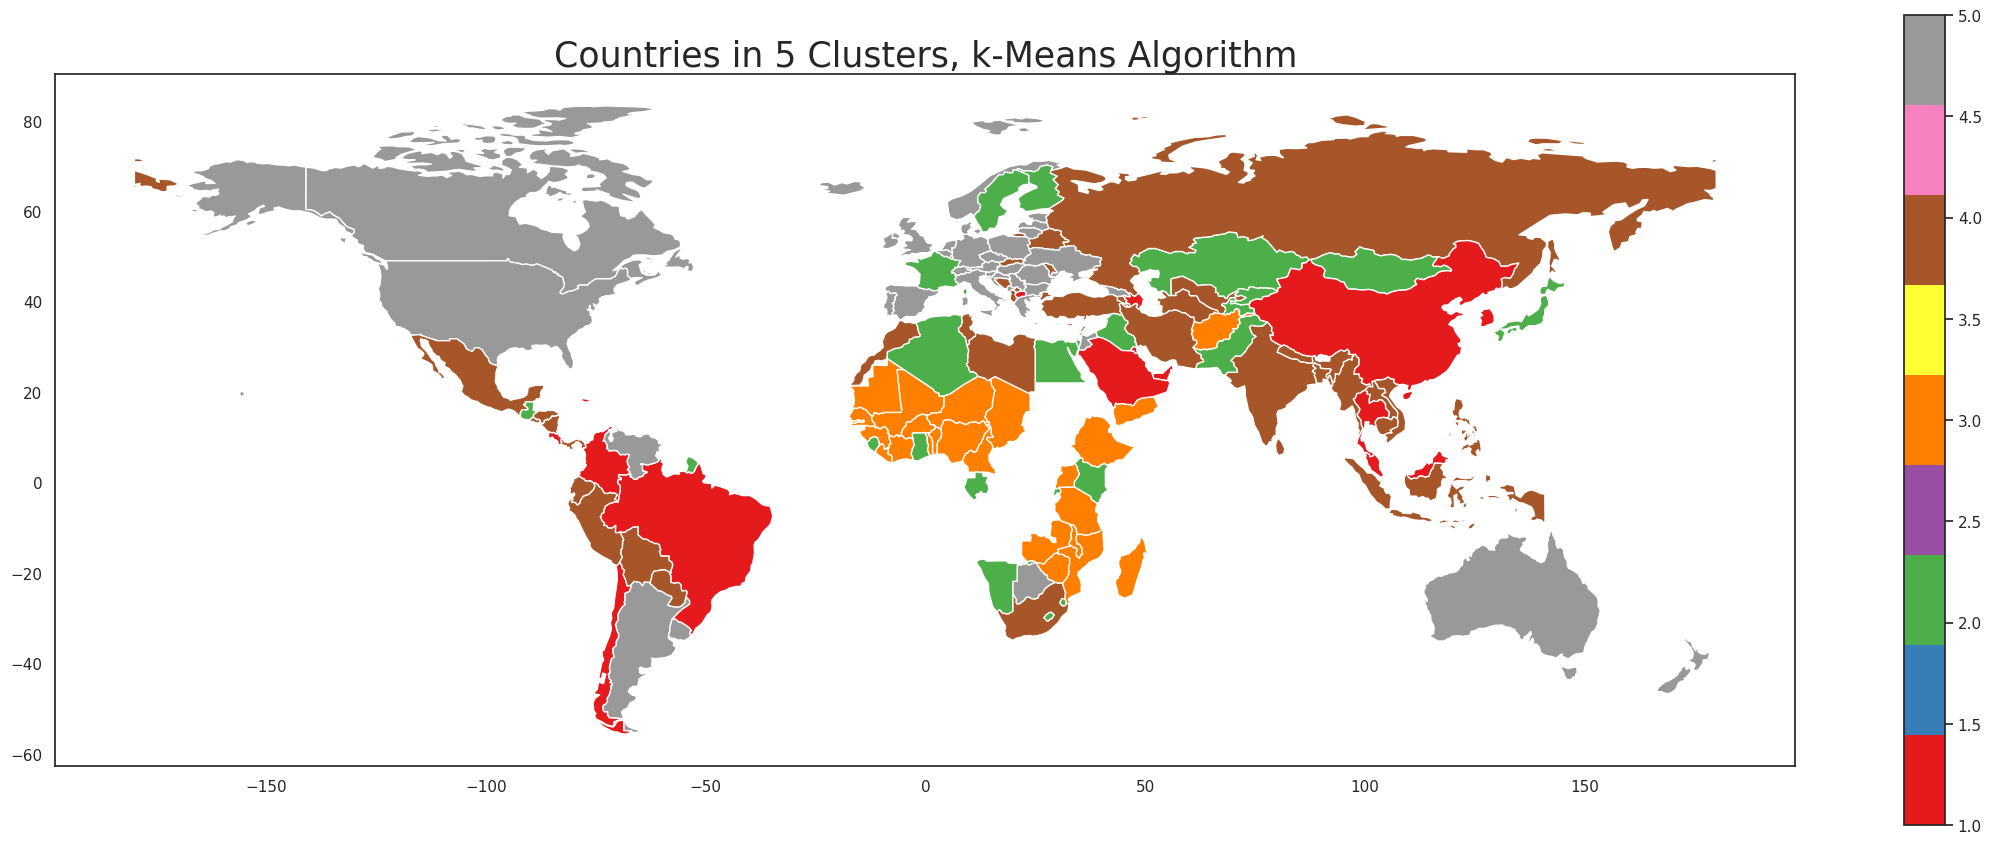

In [ ]:
# Plot Clusters
merged_cluster = pd.merge(world, cluster_df, on = 'Country')
merged_cluster
merged_cluster.plot(column='Cluster', legend = True,
           figsize=(25, 10), cmap='Set1')
plt.title('Countries in 5 Clusters, k-Means Algorithm',fontsize=25)
plt.show()

In [ ]:
#plot variables based on the five clusters to see if these characteristics are different among each cluster (which would make sense)

In [ ]:
#can use mean or median
mean_corrup = np.array([]) #array of corruption for each cluster 1,2,3,4,5
mean_gov = np.array([]) #array of corruption for each row
mean_pol = np.array([]) #array of corruption for each row
mean_law = np.array([]) #array of corruption for each row

for i in np.arange(5):
  mean_corrup = np.append(mean_corrup, no_null_df[no_null_df.Cluster == i+1]['corruption'].dropna().mean())
  mean_gov = np.append(mean_gov, no_null_df[no_null_df.Cluster == i+1]['government_effectiveness'].mean())
  mean_pol = np.append(mean_pol, no_null_df[no_null_df.Cluster == i+1]['political_stability'].mean())
  mean_law = np.append(mean_law, no_null_df[no_null_df.Cluster == i+1]['rule_of_law'].mean())

In [ ]:
mean_cluster_df=pd.DataFrame({'Corruption':mean_corrup, 'Gov Effectiveness':mean_gov, 'Political Stability':mean_pol, 'Rule of Law':mean_law})
mean_cluster_df['Cluster'] = np.array([1, 2, 3, 4, 5])
mean_cluster_df

,Corruption,Gov Effectiveness,Political Stability,Rule of Law,Cluster
0,0.330087,0.605798,0.185992,0.429620,1
1,-0.167762,-0.147057,-0.343294,-0.177654,2
2,-0.783909,-0.916546,-0.993598,-0.826508,3
3,-0.659161,-0.413390,-0.446935,-0.559353,4
4,0.837495,0.822576,0.445177,0.805679,5


<ipython-input-165-f86c30273eaf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=12)


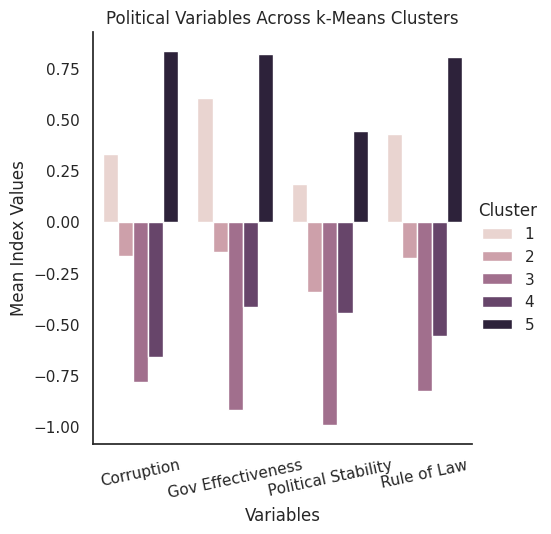

In [ ]:
sns.set(style='white')
df_sb = pd.melt(mean_cluster_df, id_vars = "Cluster")
df_sb = df_sb.rename(columns = {"variable": "Variables", "value": "Mean Index Values"})
my_plot = sns.catplot(x = 'Variables', y='Mean Index Values',
               hue = 'Cluster',data=df_sb, kind='bar')
for axes in my_plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=12)
    _ = axes.set_title( "Political Variables Across k-Means Clusters" , size = 12 )
plt.show()